In [ ]:
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf

# Z score
# from scipy import stats          # was using to detect outliers


# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
b_data = pd.read_csv('/content/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
# Viewing the data of top 5 rows
b_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0           -5.200           37   
1  01/12/2017                204     1           -5.500           38   
2  01/12/2017                173     2           -6.000           39   
3  01/12/2017                107     3           -6.200           40   
4  01/12/2017                 78     4           -6.000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200              2000                    -17.600   
1             0.800              2000                    -17.600   
2             1.000              2000                    -17.700   
3             0.900              2000                    -17.600   
4             2.300              2000                    -18.600   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                    0.000         0.000          0.000  Winter  No Holiday   
1                    0.000         0.000          0.000  Winter  No Holiday   
2                    0.000         0.000          0.000  Winter  No Holiday   
3                    0.000         0.000          0.000  Winter  No Holiday   
4                    0.000         0.000          0.000  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
#describing dataset to get Statistical info
b_data.describe().T             #.T is used to transpose the table, we can also use transpose() function

count     mean     std     min     25%      50%  \
Rented Bike Count         8760.000  704.602 644.997   0.000 191.000  504.500   
Hour                      8760.000   11.500   6.923   0.000   5.750   11.500   
Temperature(°C)           8760.000   12.883  11.945 -17.800   3.500   13.700   
Humidity(%)               8760.000   58.226  20.362   0.000  42.000   57.000   
Wind speed (m/s)          8760.000    1.725   1.036   0.000   0.900    1.500   
Visibility (10m)          8760.000 1436.826 608.299  27.000 940.000 1698.000   
Dew point temperature(°C) 8760.000    4.074  13.060 -30.600  -4.700    5.100   
Solar Radiation (MJ/m2)   8760.000    0.569   0.869   0.000   0.000    0.010   
Rainfall(mm)              8760.000    0.149   1.128   0.000   0.000    0.000   
Snowfall (cm)             8760.000    0.075   0.437   0.000   0.000    0.000   

                               75%      max  
Rented Bike Count         1065.250 3556.000  
Hour                        17.250   23.000  
Temperature(°C)             22.500   39.400  
Humidity(%)                 74.000   98.000  
Wind speed (m/s)             2.300    7.400  
Visibility (10m)          2000.000 2000.000  
Dew point temperature(°C)   14.800   27.200  
Solar Radiation (MJ/m2)      0.930    3.520  
Rainfall(mm)                 0.000   35.000  
Snowfall (cm)                0.000    8.800

In [ ]:
#converting few names for convenience
b_data.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [ ]:
#@title Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
#@title printing shape of the dataset
print(f'Shape : {b_data.shape} \n' )
print(f' Features : {b_data.columns.to_list()}')   #to_list convert series to list

Shape : (8760, 14) 

 Features : ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


In [ ]:
#checking null values for confirmation
b_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [ ]:
#checking for duplicates
b_data.duplicated().value_counts()

False    8760
Name: count, dtype: int64

In [ ]:
#creating copy to keep oringal data safe
df = b_data.copy()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
#Extracting month from date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

#Extracting year
df['year'] = df['Date'].dt.year

df.head(1)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-12-01                254     0       -5.200        37       2.200   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                -17.600            0.000     0.000     0.000   

  Seasons     Holiday Functioning_Day month     day  year  
0  Winter  No Holiday             Yes   Dec  Friday  2017

In [ ]:
# funciton to count total number of different value in specific column
def total(df,var):
  total = len(df[var].value_counts())
  return total

In [ ]:
#calculating total count of different value in each column
total_lenght_different_column = {
    'Seasons': total(df,'Seasons'),
    'Holiday': total(df,'Holiday'),
    'Funtioning_Day': total(df,'Functioning_Day'),
    'month' : total(df,'month'),
    'day'   : total(df,'day'),
    'year'  : total(df,'year')
}

In [ ]:

total_df = pd.DataFrame.from_dict(total_lenght_different_column,orient='index')

In [ ]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0       -5.200        37       2.200        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   

      Holiday Functioning_Day month     day  year  
0  No Holiday             Yes   Dec  Friday  2017

In [ ]:
# converting hour feature into categorial by changing is type
df['Hour']=df['Hour'].astype('object')

In [ ]:
#total count of different value in
total_df.T

Seasons  Holiday  Funtioning_Day  month  day  year
0        4        2               2     12    7     2

In [ ]:
df['year'] = df['year'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  day                    8760 non-null   object 
 15  year

In [ ]:
#creating copy
dfr = df.copy()

In [ ]:
#storing numerical feature in separate variable
num_feature = dfr.select_dtypes(exclude='object')    #Return a subset of the DataFrame’s columns based on the column dtypes
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


In [ ]:
#storing categorial feature in separate variable
cat_feature = dfr.loc[:,  ~dfr.columns.isin(num_feature.columns.to_list())] #Pandas isin() method is used to filter data frames using boolean value true of false
print(f'Categorical feature : {cat_feature.columns.to_list()}')               #Tilde sign (~)works as a negation operator i.e reverse true to false and false to true

Categorical feature : ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month', 'day', 'year']


In [ ]:
#@title Univariate Analysis
#analysing numerical value using density plot with mean and median
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_context('poster');
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

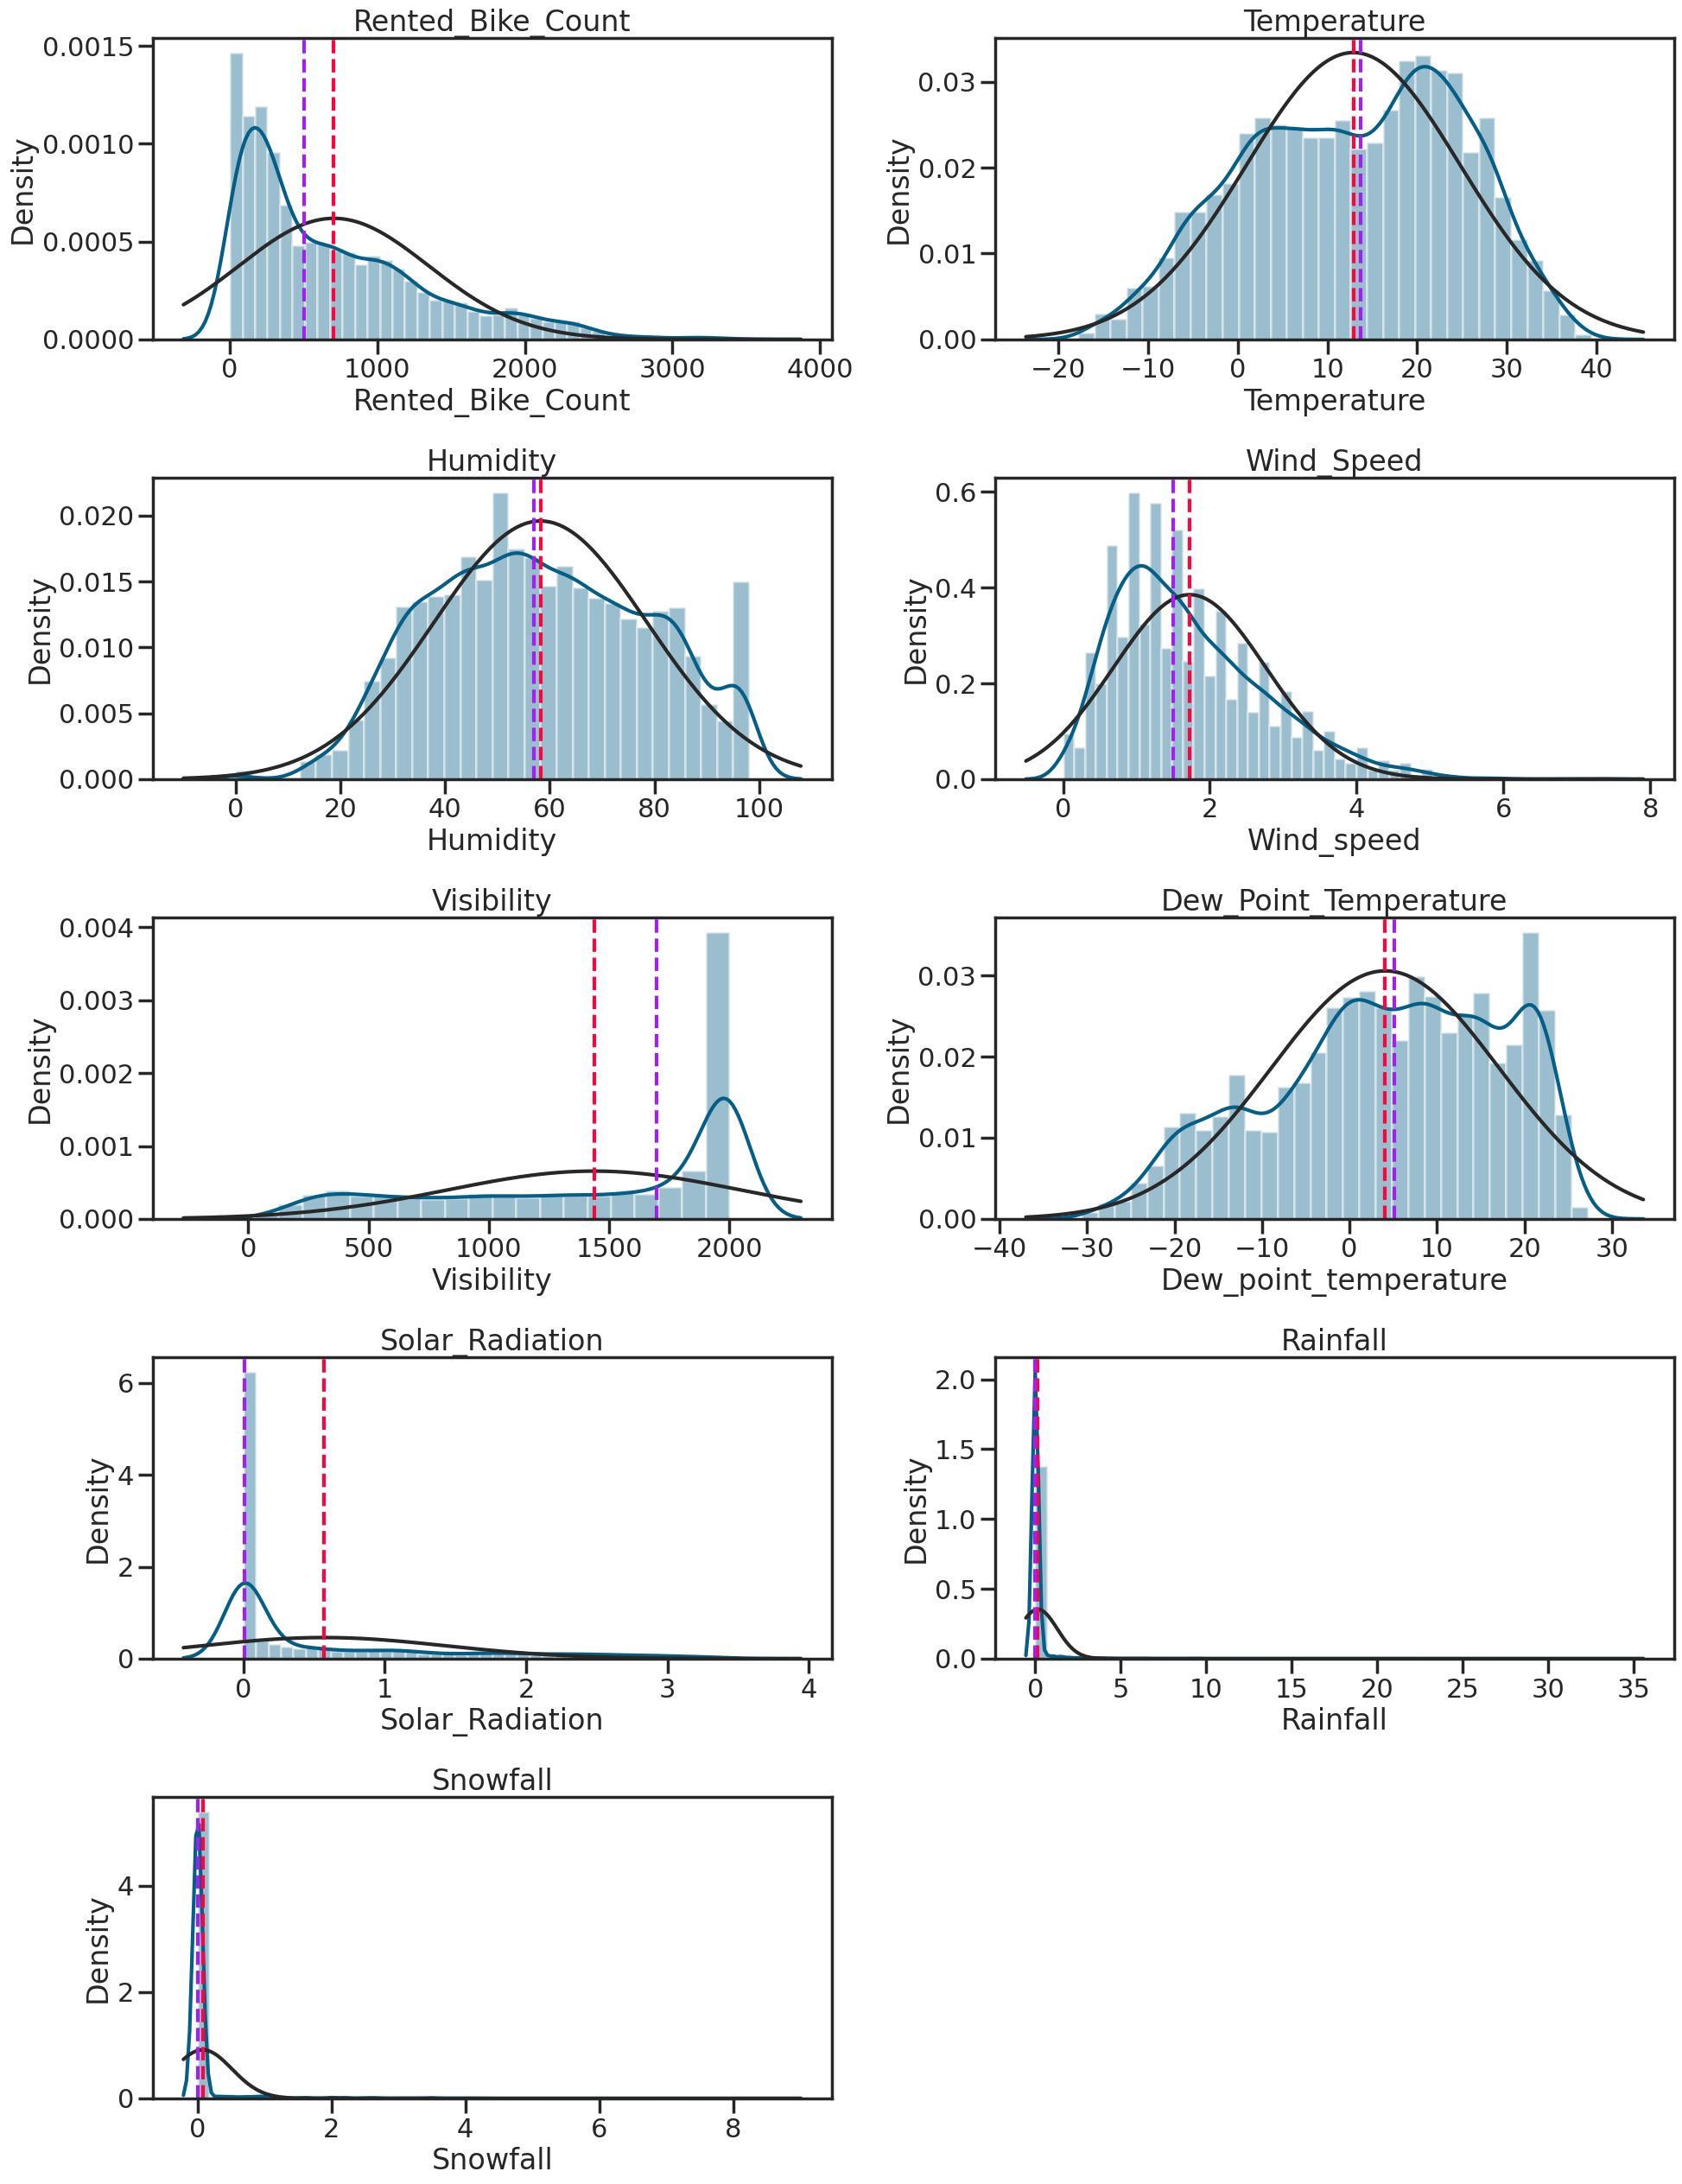

In [ ]:
density_plot(dfr,num_feature)

<Figure size 1500x600 with 0 Axes>

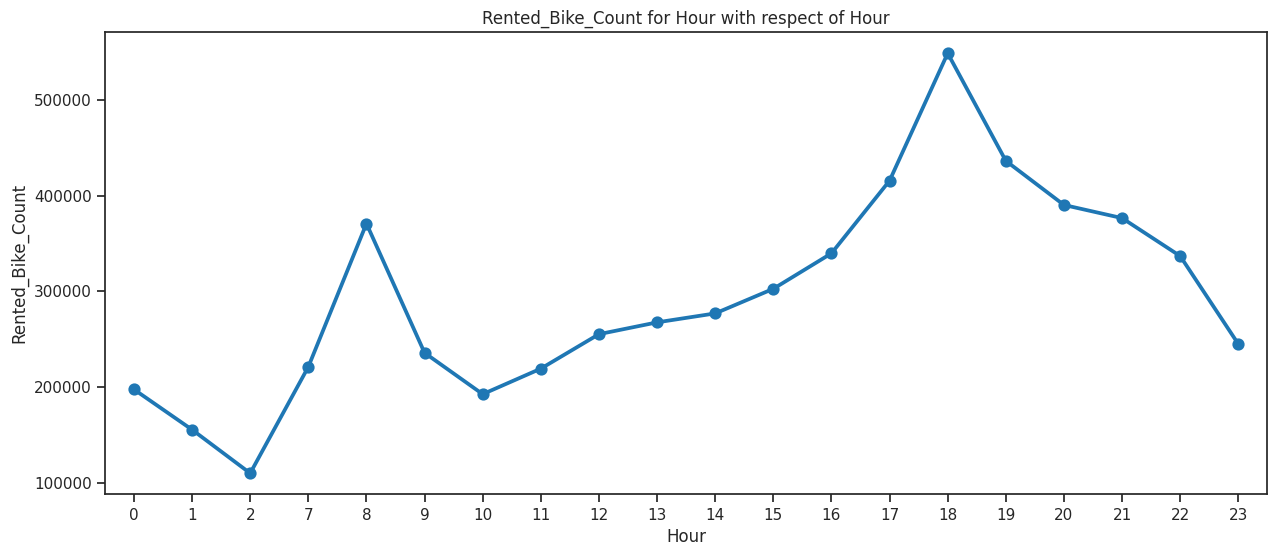

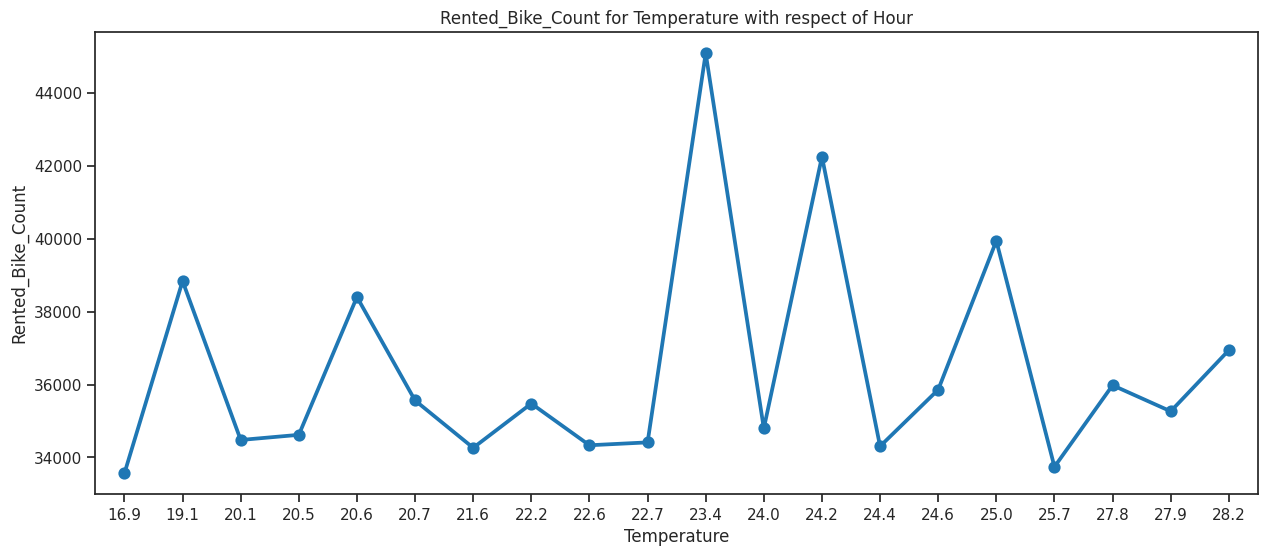

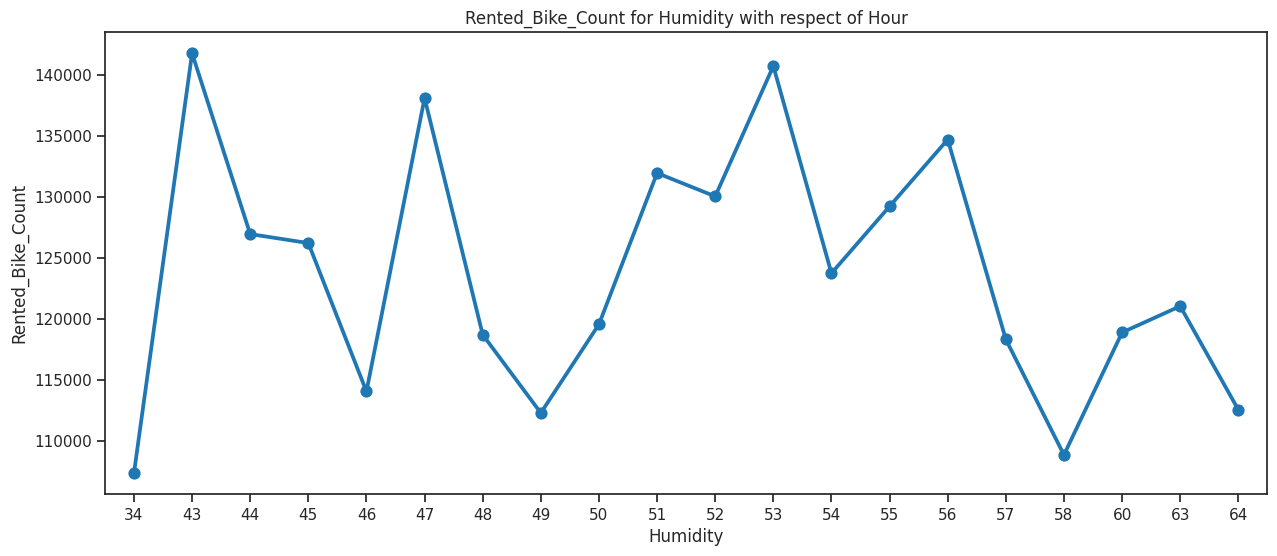

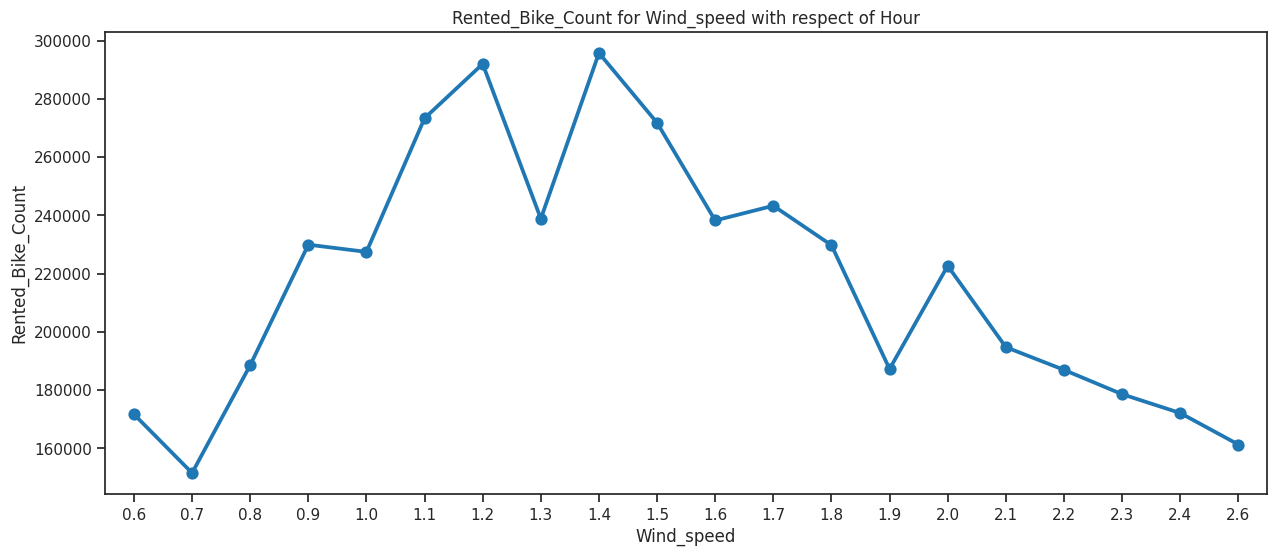

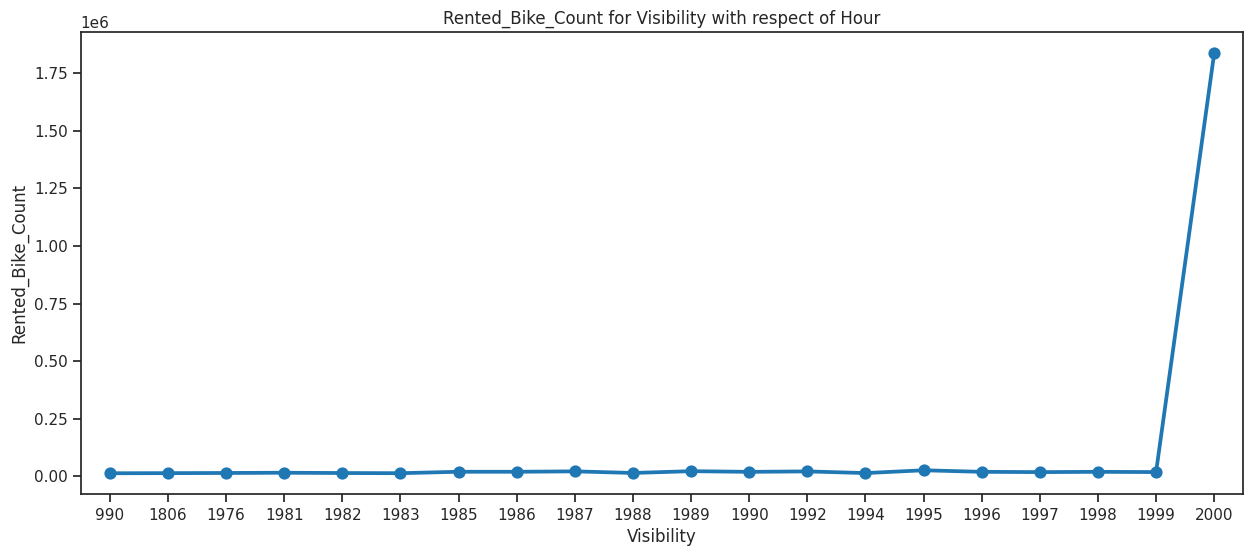

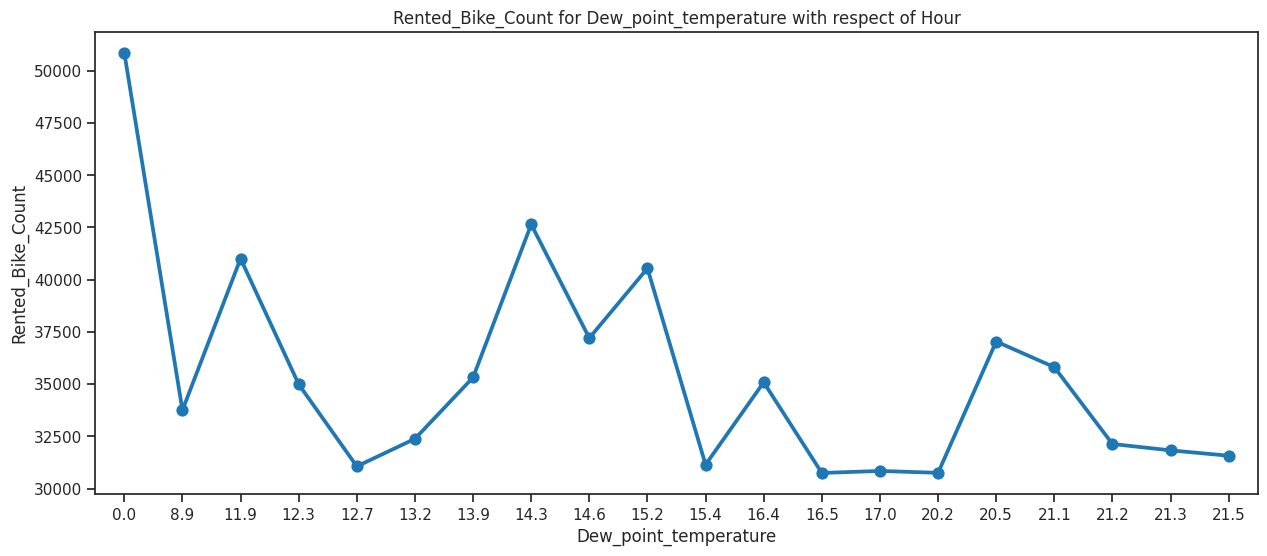

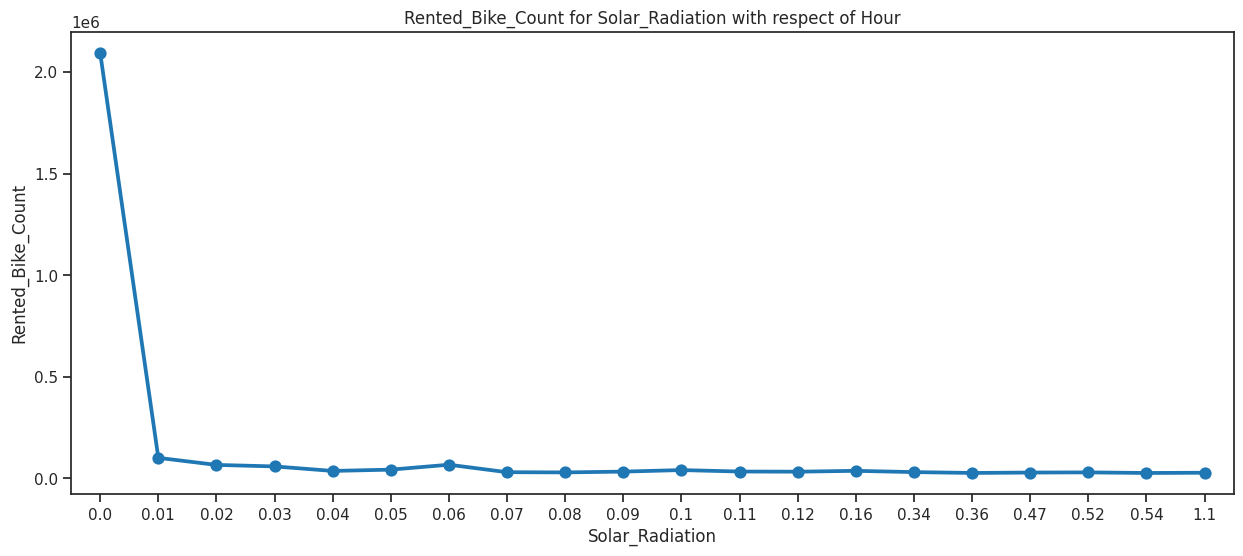

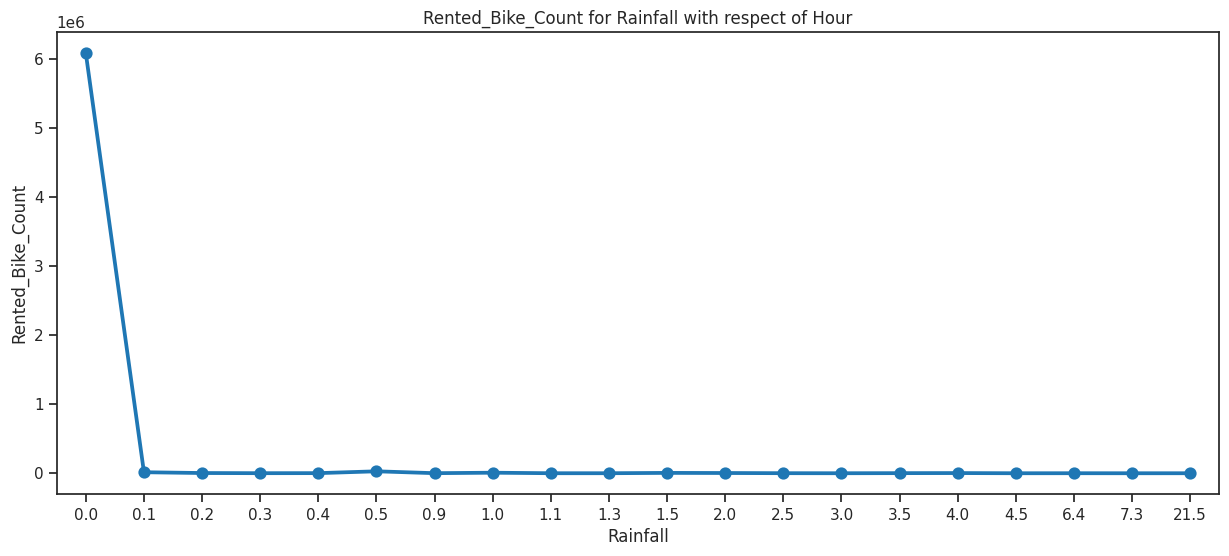

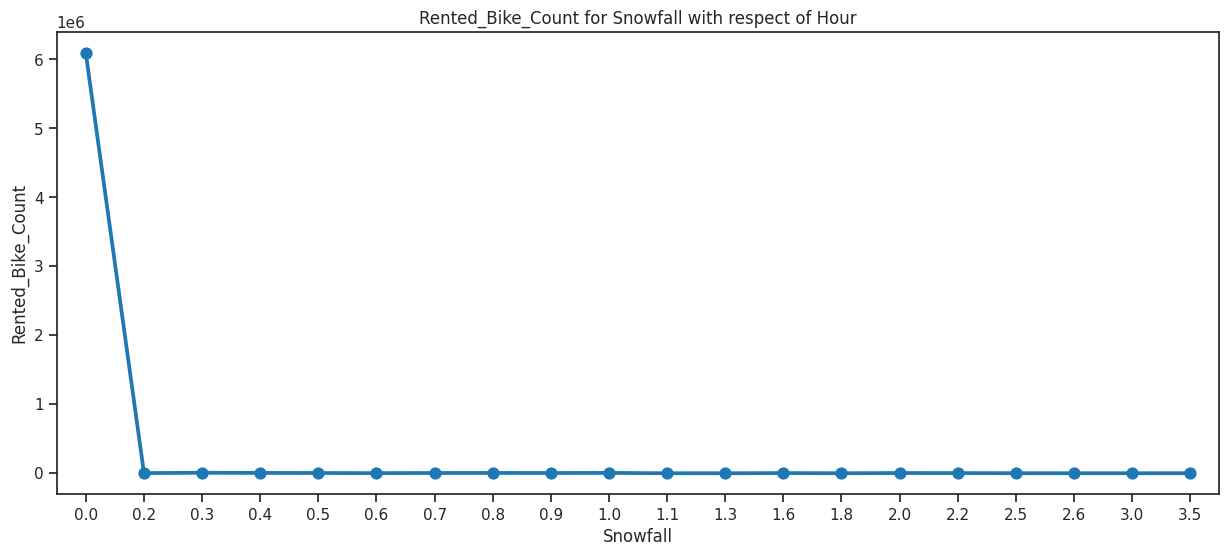

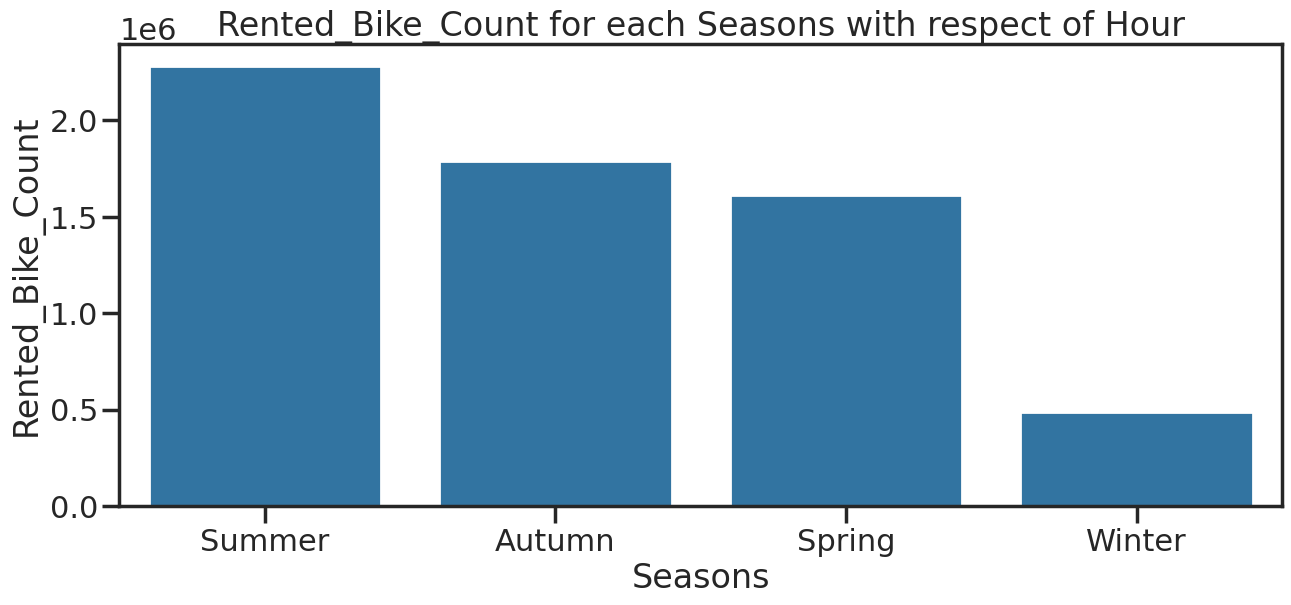

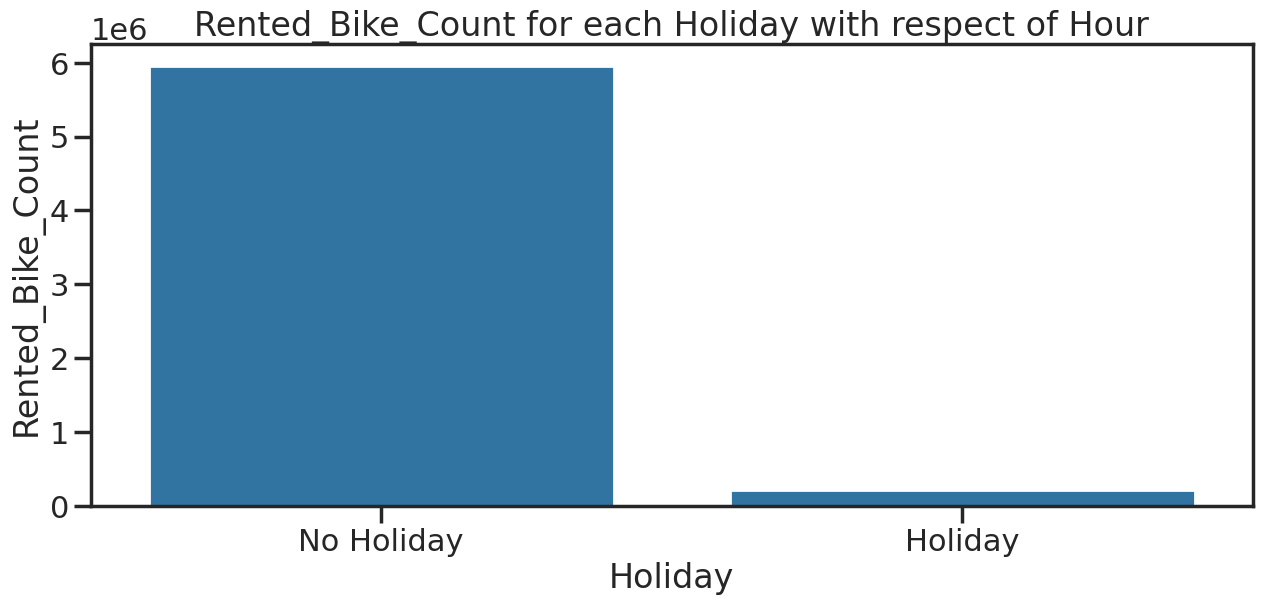

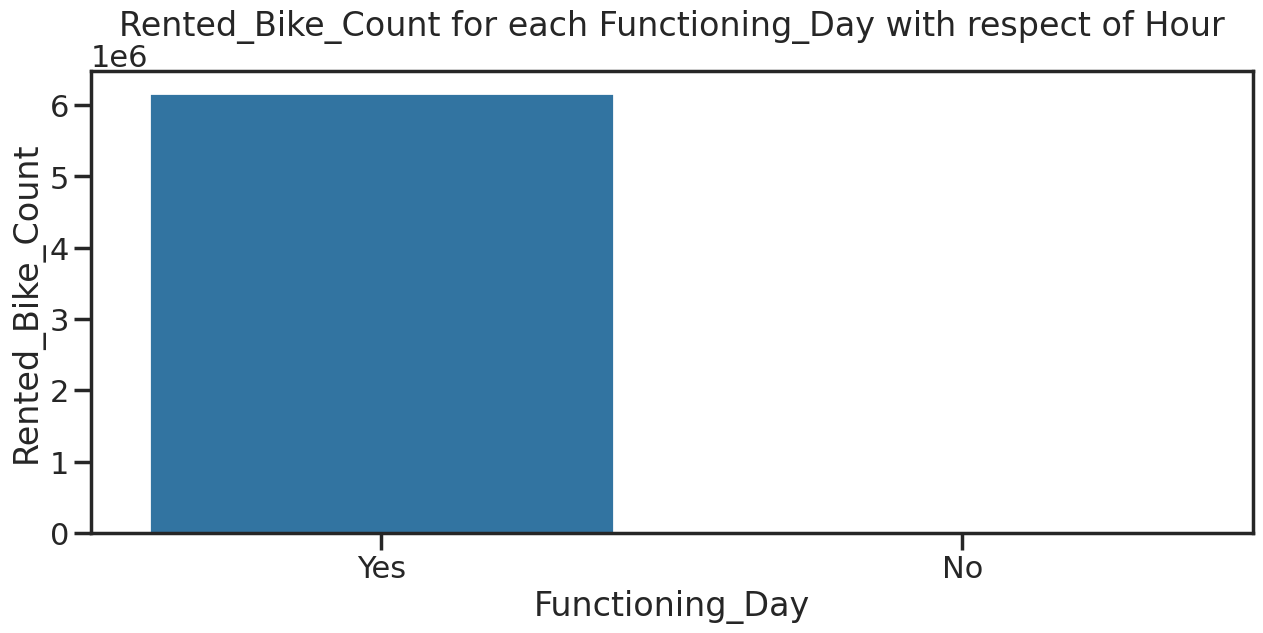

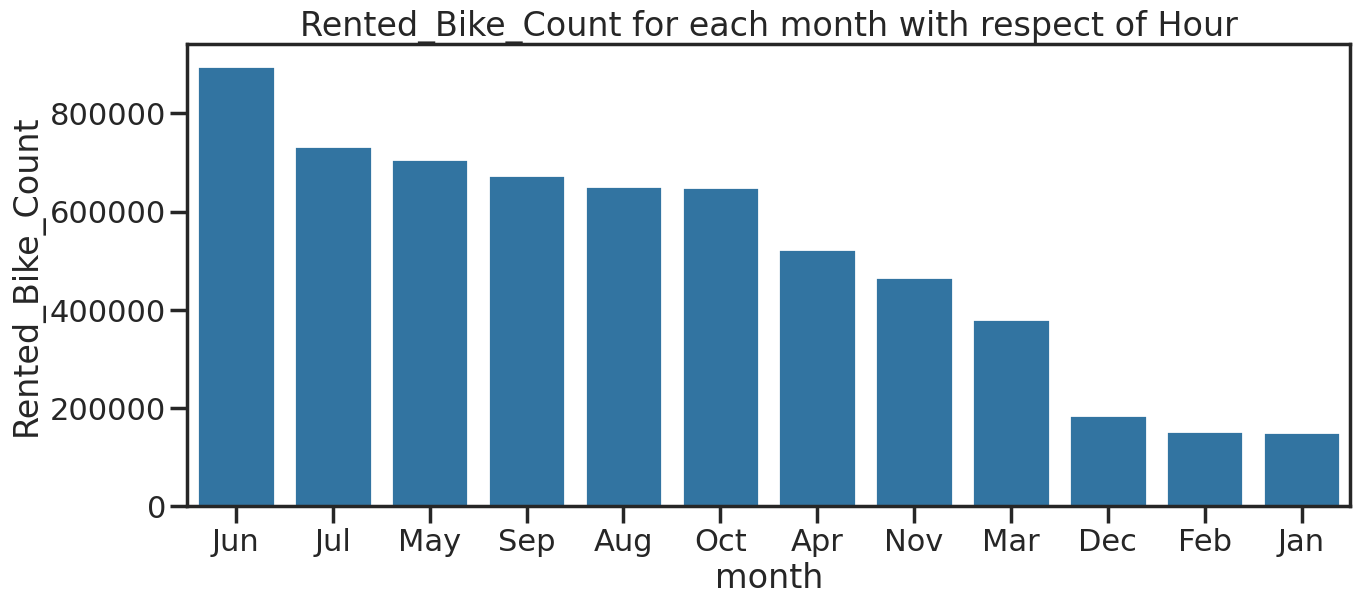

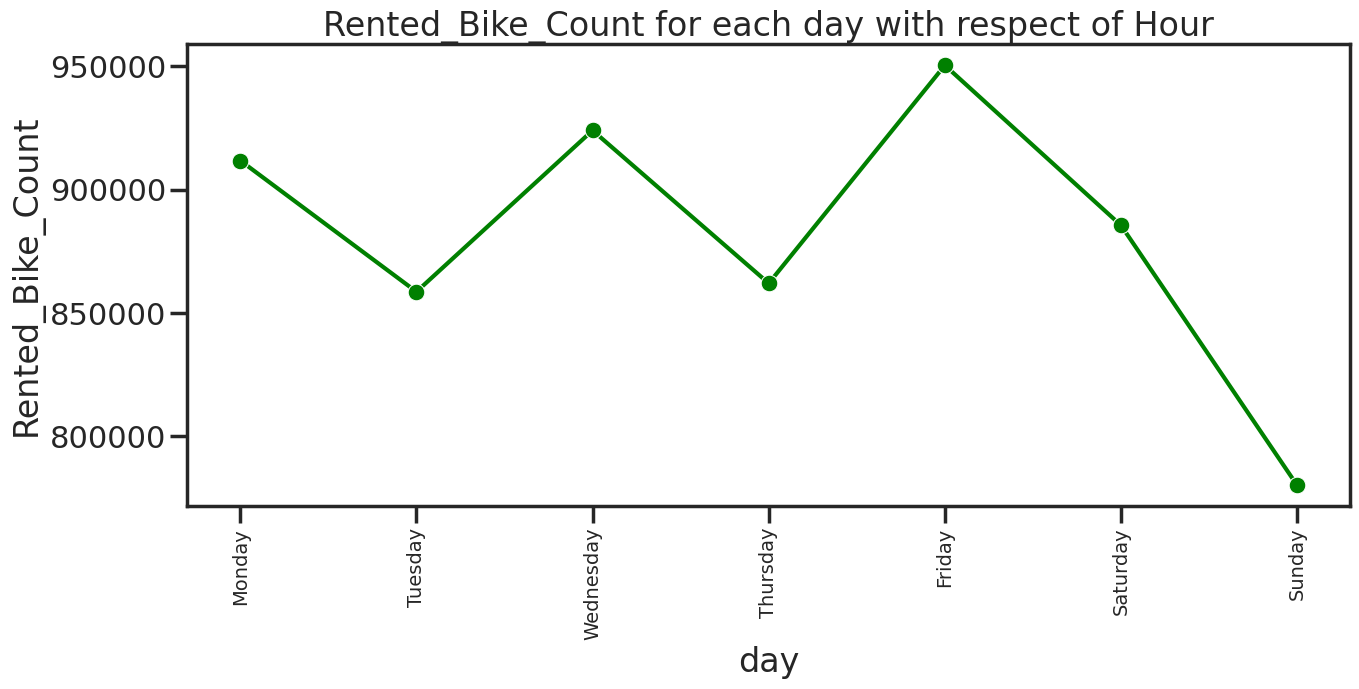

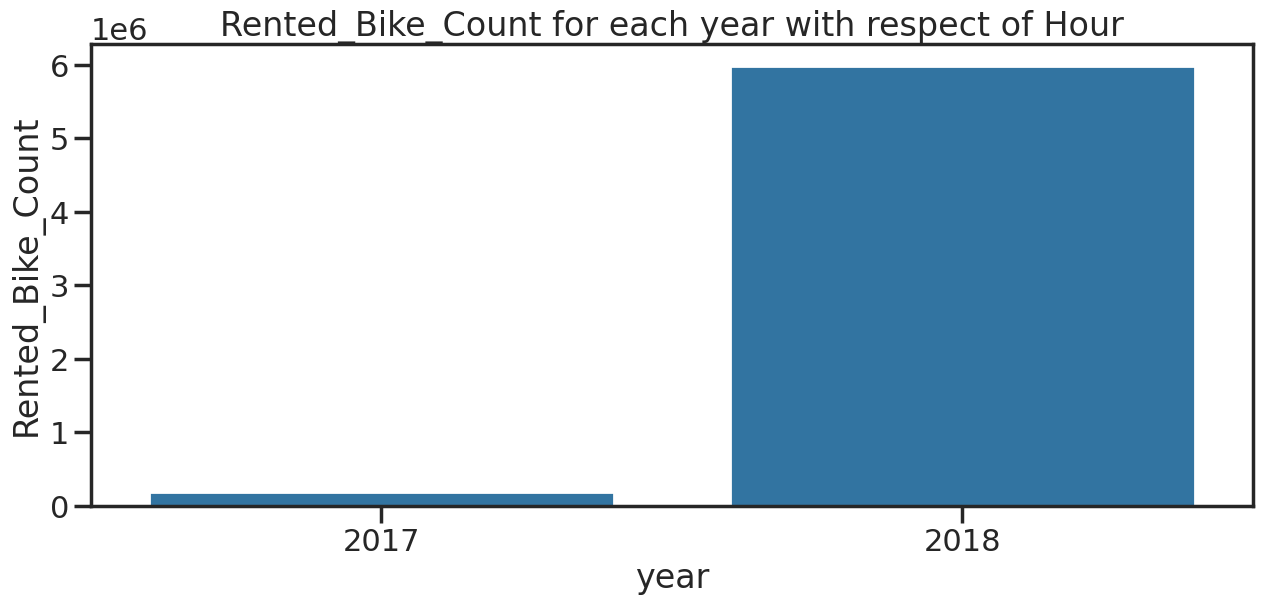

In [ ]:
#comparing different feature with bike count
for i in dfr.columns:
  plt.figure(figsize=(15,6))
  if i == 'Rented_Bike_Count':
    pass
  elif i in ['Seasons','Holiday','Functioning_Day','month','year']:
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    sns.set_context('poster');
    sns.barplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
    print('\n')
  elif i == 'day':
    workingdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    chart = workingday.merge(grp)
    sns.set_context('poster');
    sns.lineplot(data= chart, x=chart[i],y= chart['Rented_Bike_Count'], marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  else :
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False).head(20)
    sns.set_context('notebook');
    sns.pointplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for {i} with respect of Hour");
    print('\n')

  plt.show()

In [ ]:

#groupby function for finding sum with respect to categorial features
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
  return data

In [ ]:
#Rented_Bike_Count with respect to Functioning_Day
group_by(dfr,'Functioning_Day')

Functioning_Day  Rented_Bike_Count
1             Yes            6172314
0              No                  0

In [ ]:
#Rented_Bike_Count vs holiday
group_by(dfr,'Holiday')

Holiday  Rented_Bike_Count
1  No Holiday            5956419
0     Holiday             215895

In [ ]:
#Rented_Bike_Count with respect to year
group_by(dfr,'year')

year  Rented_Bike_Count
1  2018            5986984
0  2017             185330

In [ ]:
#Rented_Bike_Count with respect to season
group_by(dfr,'Seasons')

Seasons  Rented_Bike_Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169

In [ ]:
#Rented_Bike_Count with respect to day
weekend = group_by(dfr,'day')
chutti = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
chutti

day  Rented_Bike_Count
2  Saturday             885492
3    Sunday             780194

In [ ]:
#Rented_Bike_Count with respect to day
workingday = group_by(dfr,'day')
office = workingday[(workingday['day'] != 'Saturday') & (workingday['day'] != 'Sunday')]
office

day  Rented_Bike_Count
0     Friday             950334
6  Wednesday             923956
1     Monday             911743
4   Thursday             861999
5    Tuesday             858596

In [ ]:
#checking total bike rented count of workingday vs weekend
d = office['Rented_Bike_Count'].sum() > chutti['Rented_Bike_Count'].sum()
print(f' Is it true that bike rented count is more on working day? {d}')

 Is it true that bike rented count is more on working day? True


In [ ]:
copy_for_future = dfr.copy()
trial = dfr.copy()

In [ ]:
#changing yes-1 and no-0 for calculation of correlation
trial['Functioning_Day']= LabelEncoder().fit_transform(trial['Functioning_Day'])

In [ ]:
trial['Functioning_Day'].value_counts()

Functioning_Day
1    8465
0     295
Name: count, dtype: int64

In [ ]:
# finding correlation between functioning day and rented bike count
corr = trial[['Rented_Bike_Count','Functioning_Day']].corr()
corr

Rented_Bike_Count  Functioning_Day
Rented_Bike_Count              1.000            0.204
Functioning_Day                0.204            1.000

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

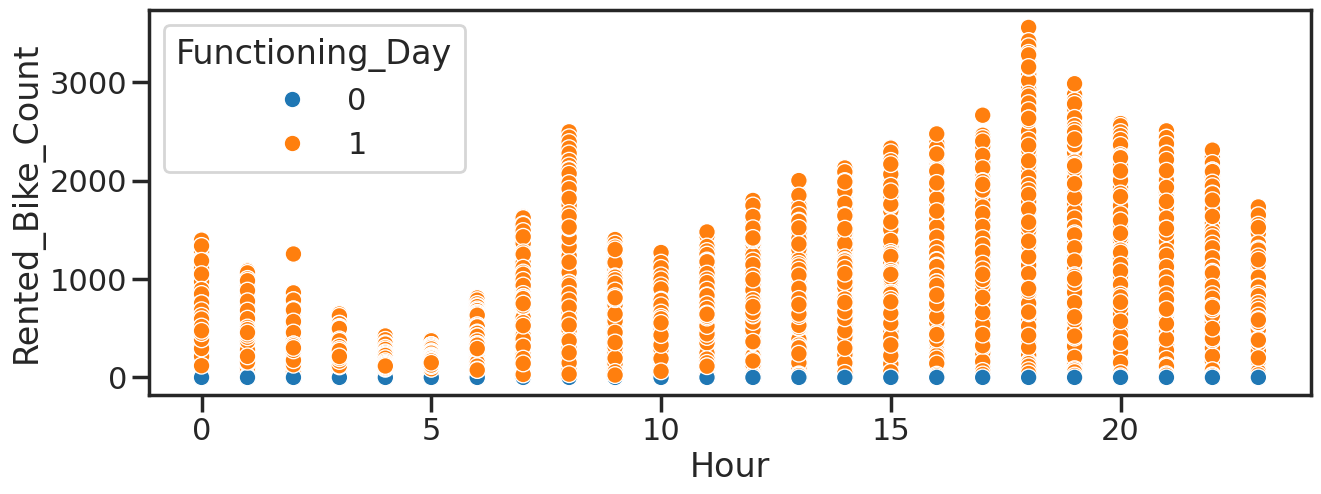

In [ ]:
#plotting scatter plot for rented bike count and functioning day
plt.figure(figsize = (15,5));
sns.scatterplot(data = trial[['Rented_Bike_Count','Hour','Functioning_Day']], x = trial['Hour'], y = trial['Rented_Bike_Count'], hue = trial['Functioning_Day'])

In [ ]:
#Removing data of non functional days with no rented bike
value = dfr.drop(dfr[dfr['Functioning_Day'] == 'No'].index)

In [ ]:
value['Functioning_Day'].value_counts()

Functioning_Day
Yes    8465
Name: count, dtype: int64

In [ ]:
#Removing entire functional day column as it of no use
value = value.drop(['Functioning_Day'], axis = 1)
value.shape

(8465, 15)

In [ ]:
#shape of new dataset
print(f'Shape of original data: {copy_for_future.shape}')
print(f'Shape of new data : {value.shape}')

Shape of original data: (8760, 16)
Shape of new data : (8465, 15)


In [ ]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
value['week'] = value['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'workingdays')

In [ ]:
value.week.value_counts()


week
workingdays    6024
Weekend        2441
Name: count, dtype: int64

In [ ]:
#getting categorial values
cat_feature = value.select_dtypes(include='object')

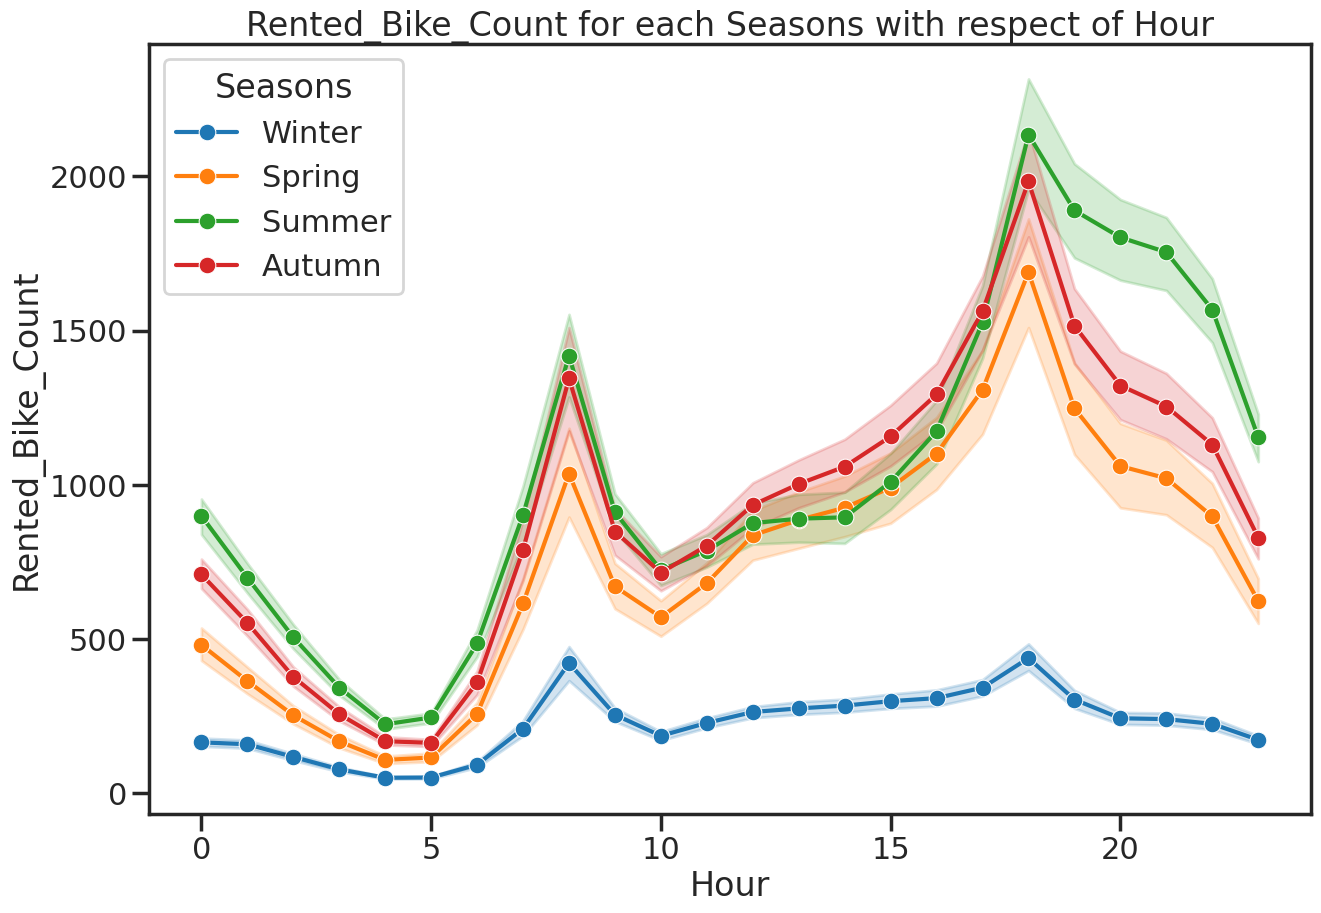

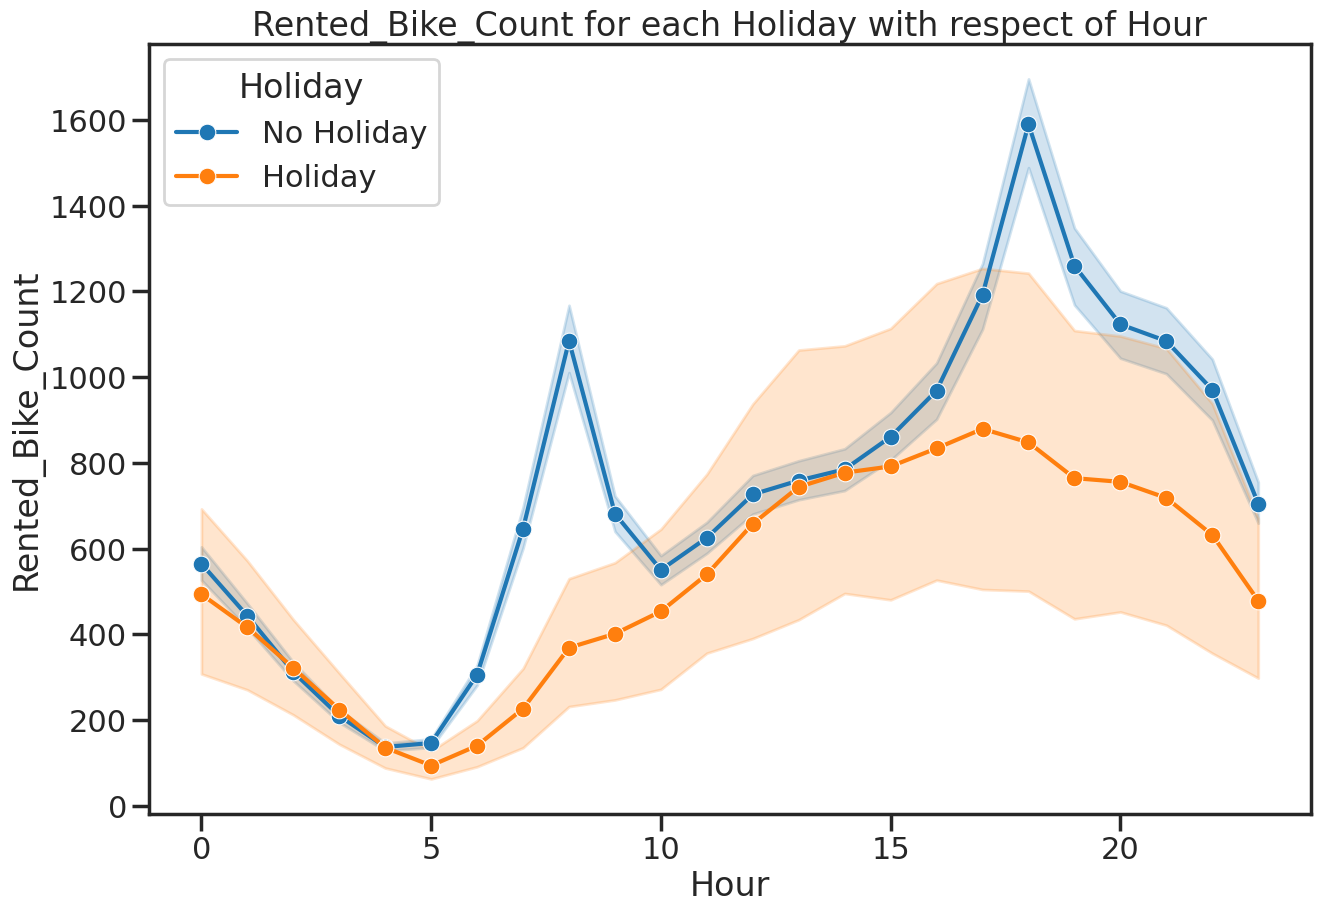

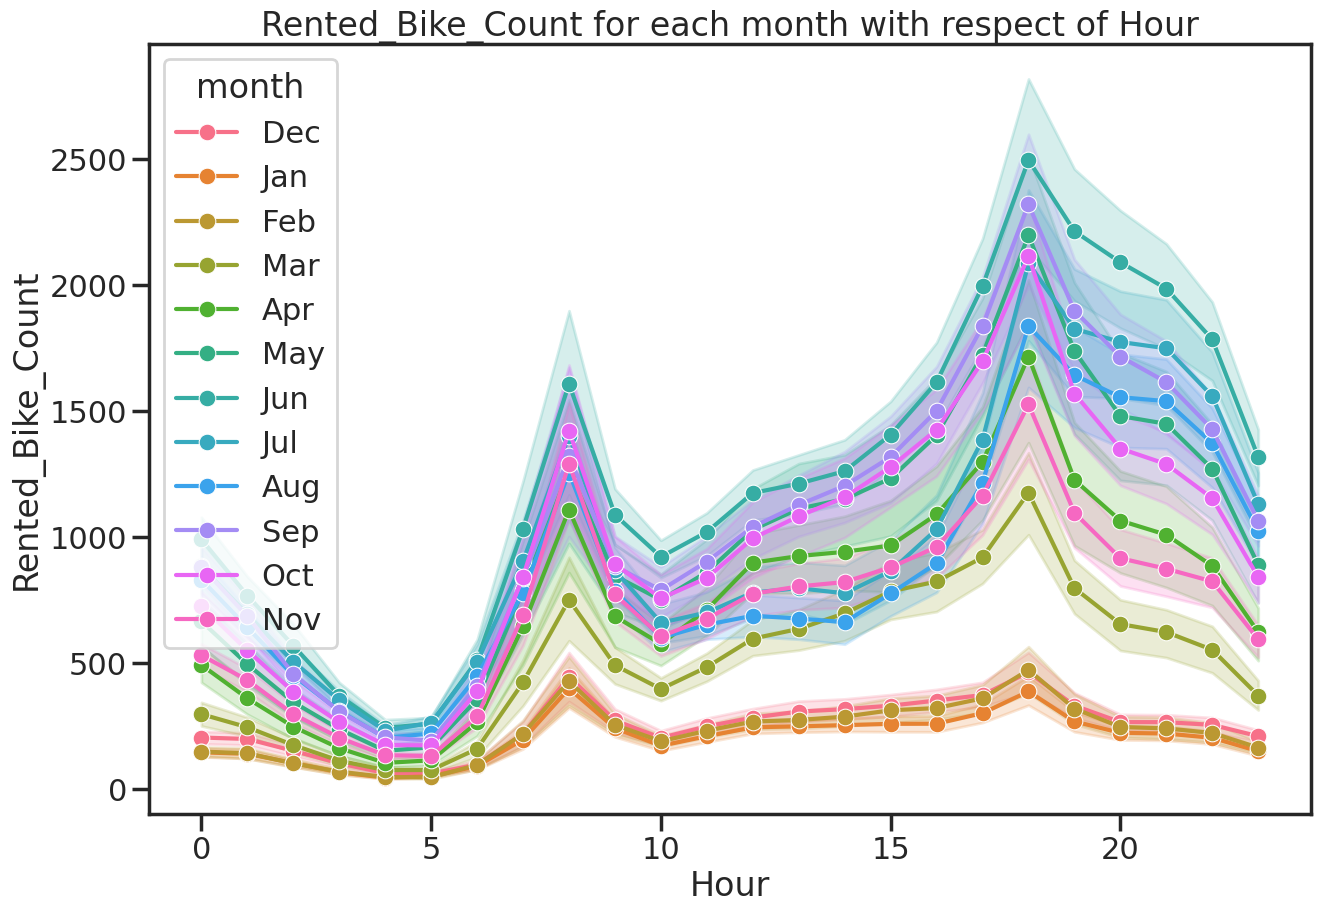

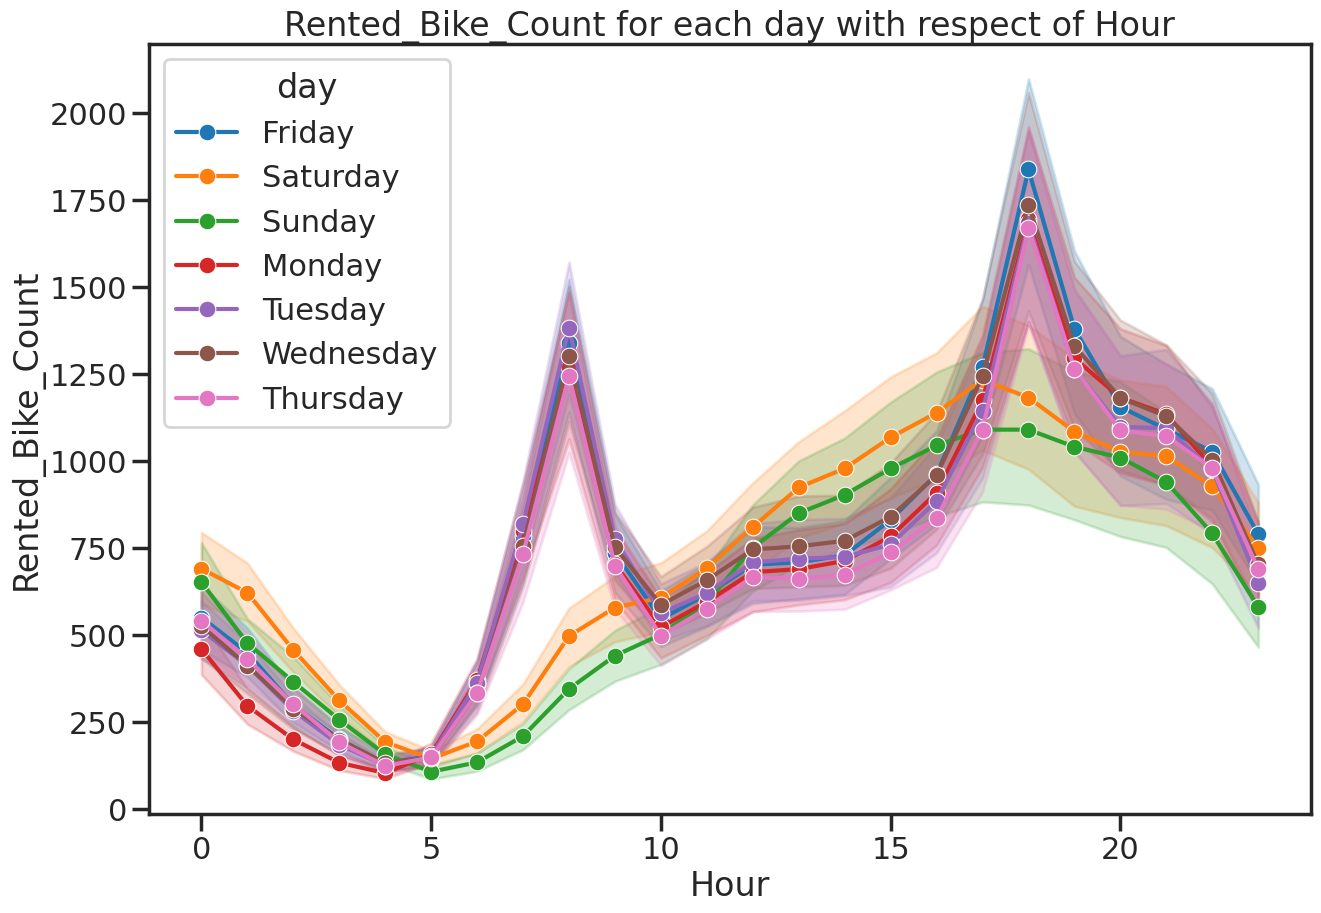

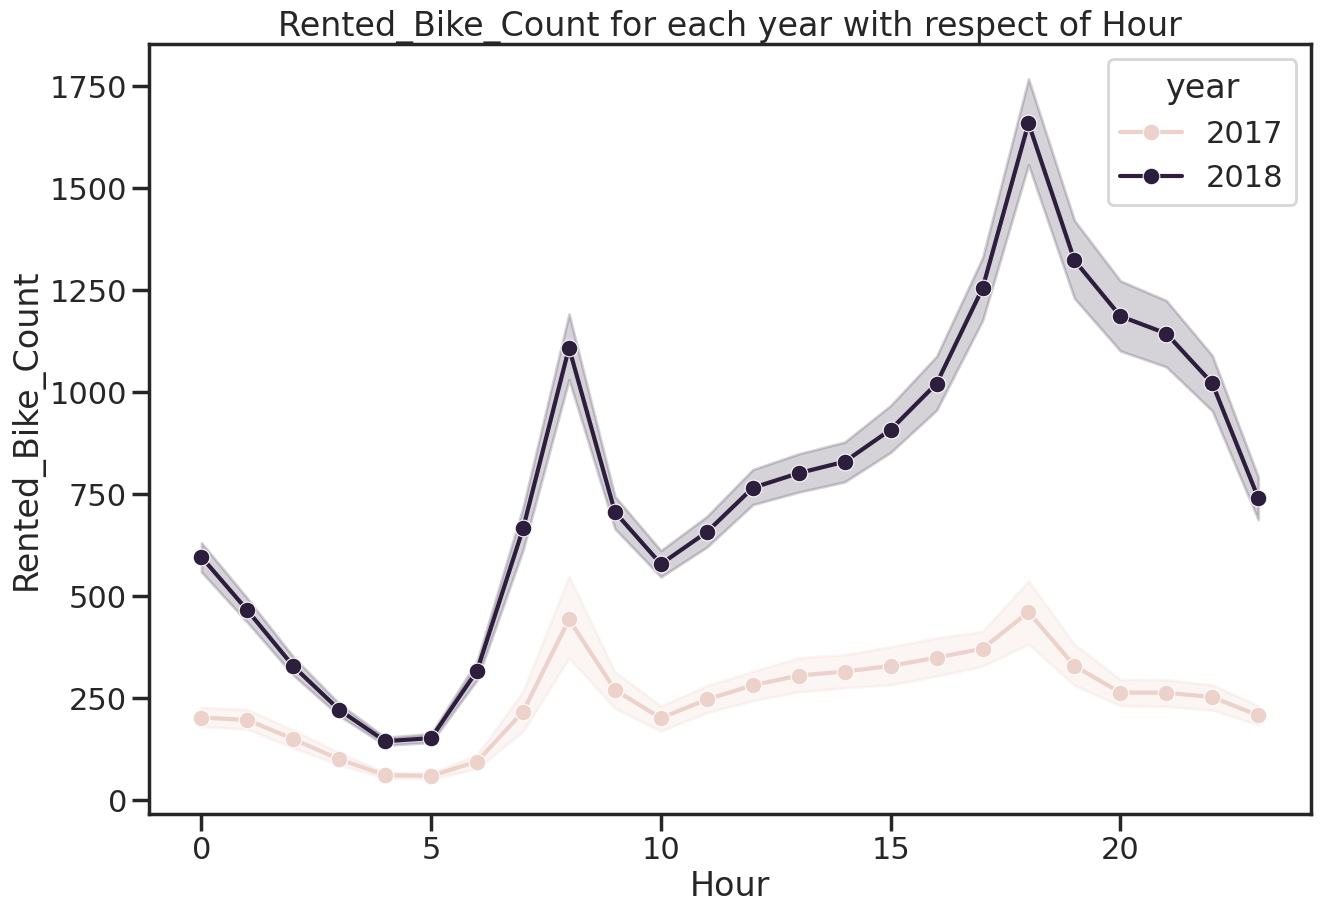

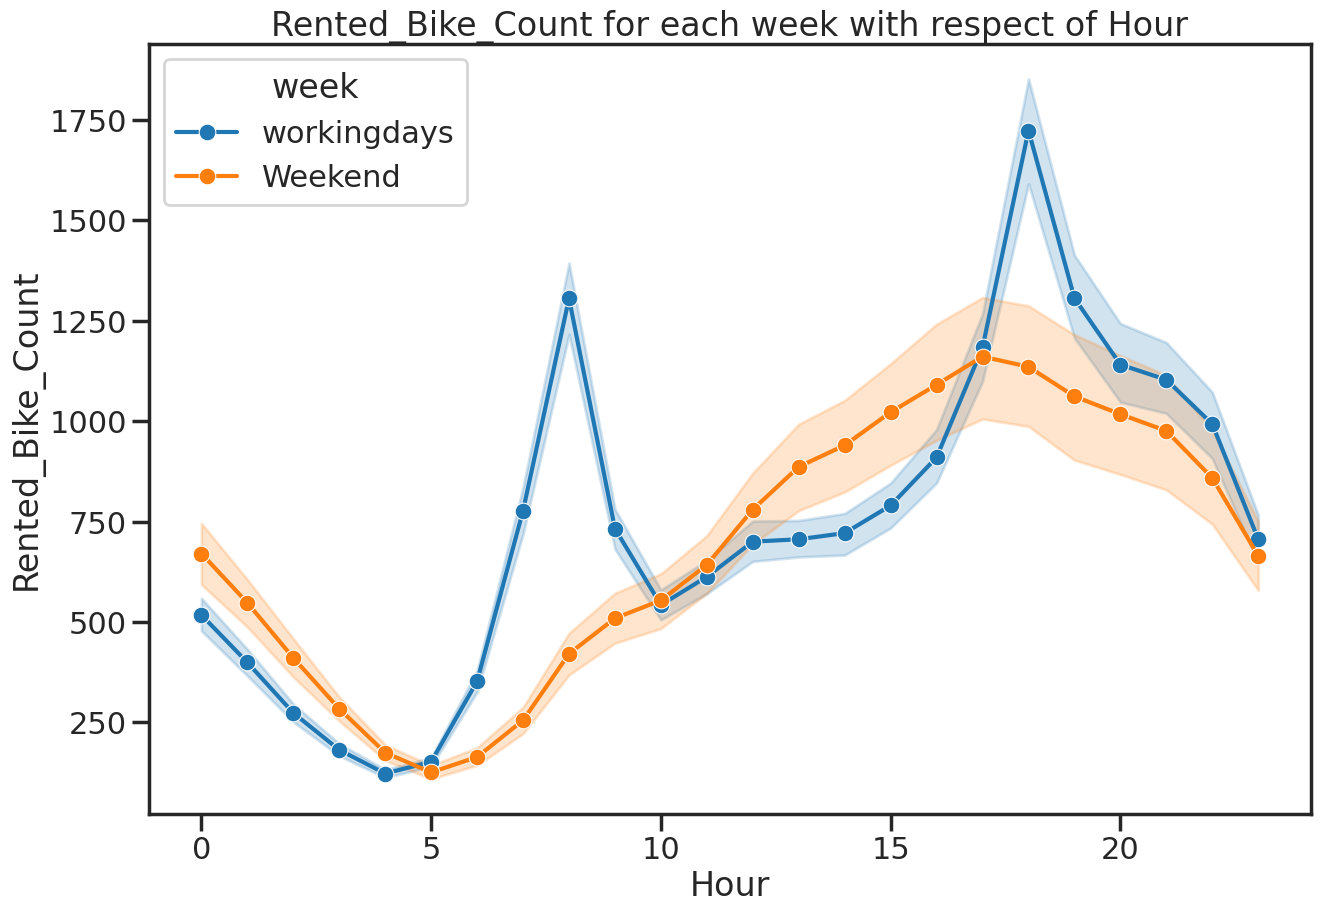

In [ ]:
#analysing hour with bike demand with respect to different third value

for i in cat_feature:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,10))
    sns.lineplot(x=value["Hour"],y=value['Rented_Bike_Count'],hue=value[i], marker ='o')
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour")
  plt.show()

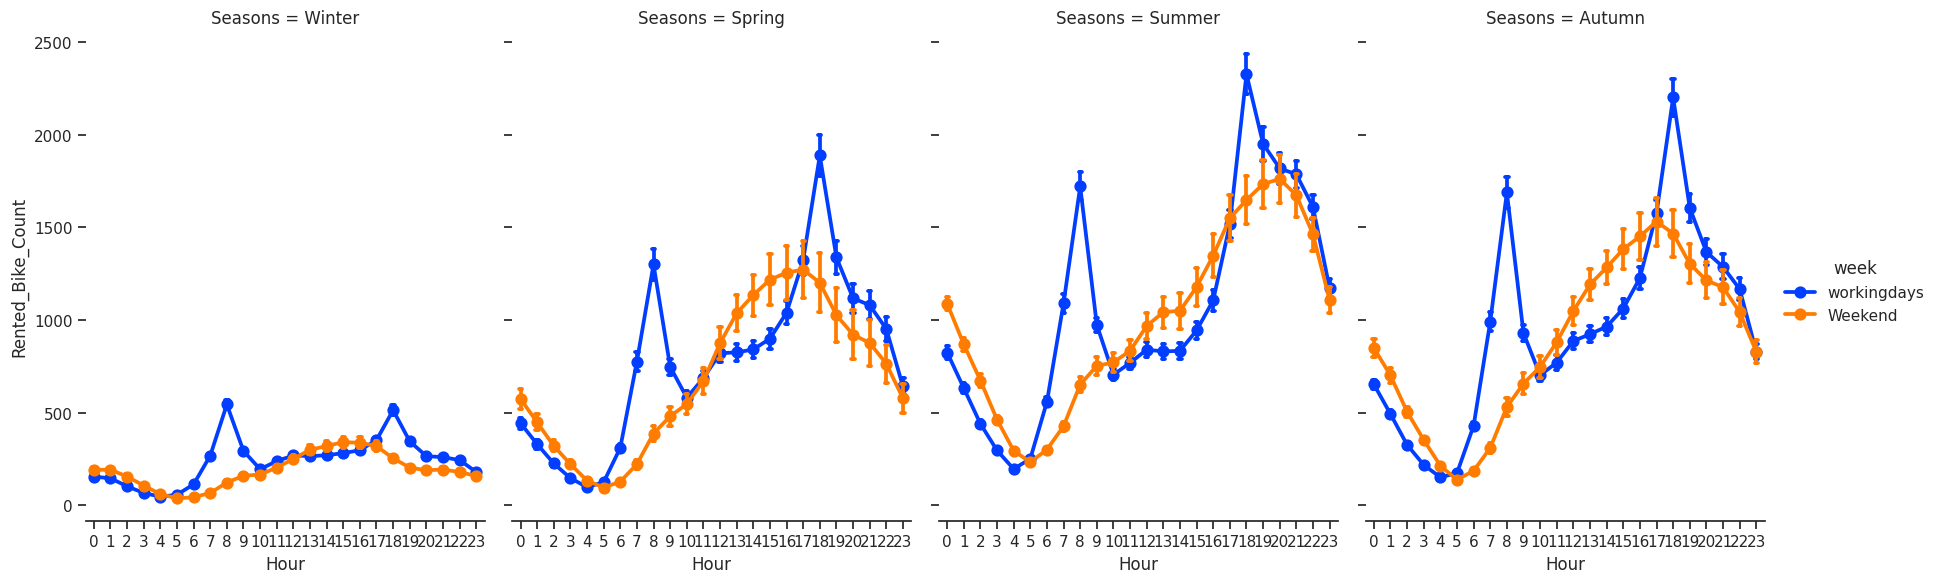

In [ ]:
# Draw a pointplot to show bike demand as a function of three categorical factors(season,week, hour)
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented_Bike_Count", hue="week", col="Seasons",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);

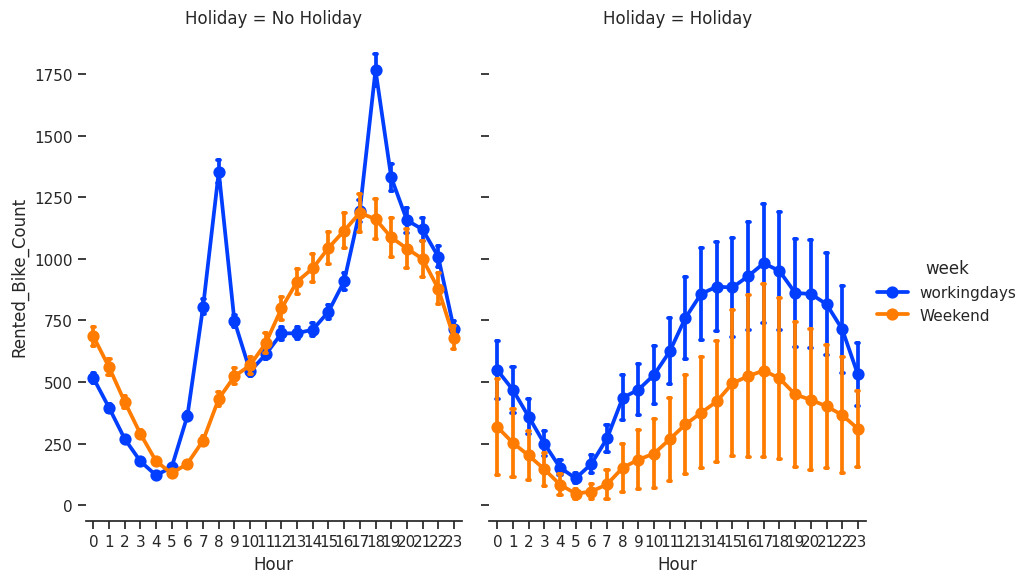

In [ ]:
# Draw a pointplot to show bike demand as a function of three categorical factors(hour, week, holiday)
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented_Bike_Count", hue="week", col="Holiday",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);

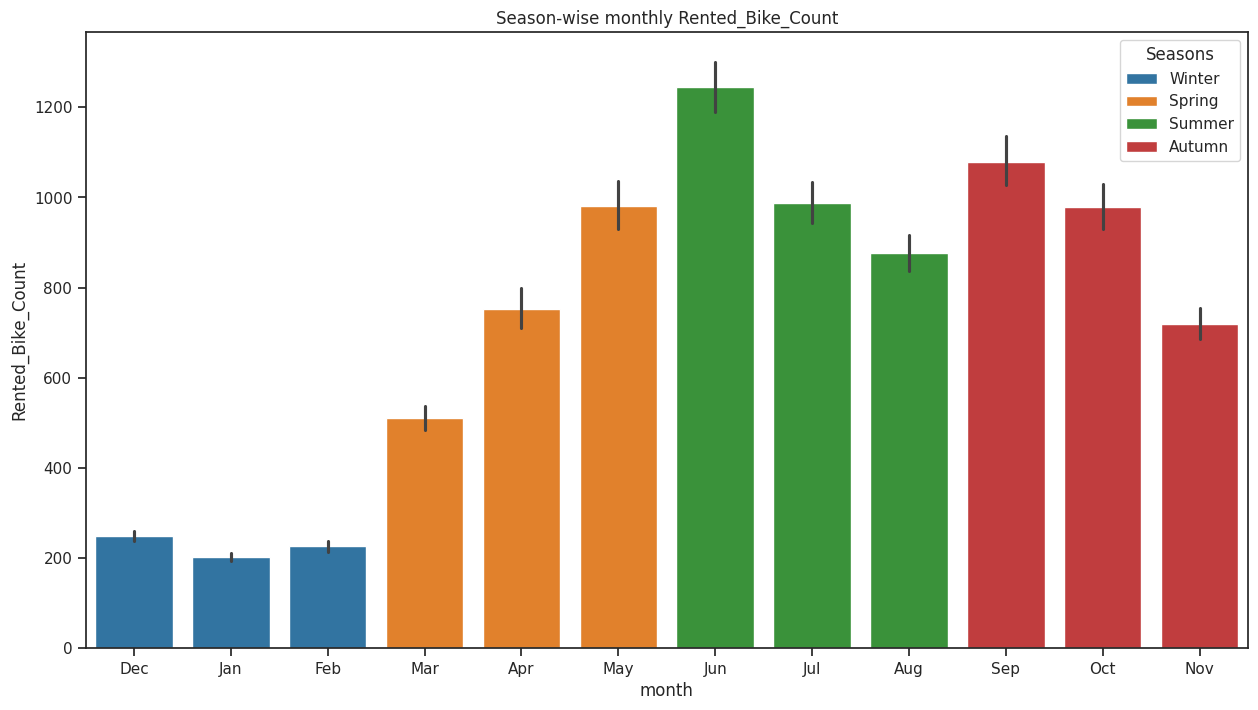

In [ ]:
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Rented_Bike_Count',data=value, hue='Seasons',ax=ax);
ax.set_title('Season-wise monthly Rented_Bike_Count');
plt.show();

In [ ]:
#checking outliers using box plot
def box_plot(df,feature):
  i=1
  for col in feature.columns :
    plt.figure(figsize = (20,18))
    plt.subplot(5,2,i);
    i=i+1
    if df[col].dtypes == 'object':
      sns.boxplot(x=df[col],y=df["Rented_Bike_Count"]);
      print('\n')
    else:
      sns.boxplot(df[col]);
      print('\n')
    plt.xticks(fontsize = 18, rotation = 90);
    plt.tight_layout();

In [ ]:
cat_feature = value.select_dtypes(include ='object')


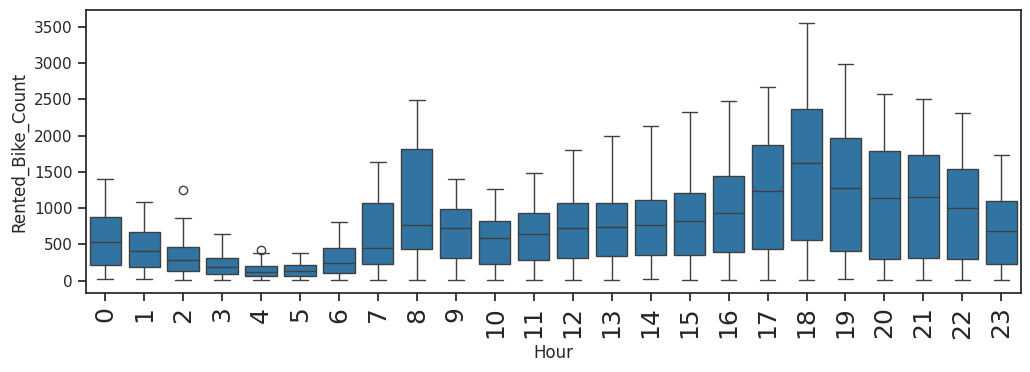

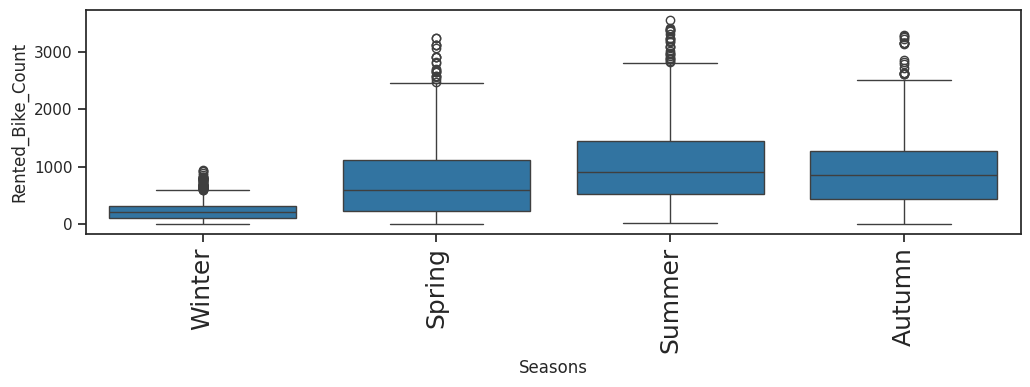

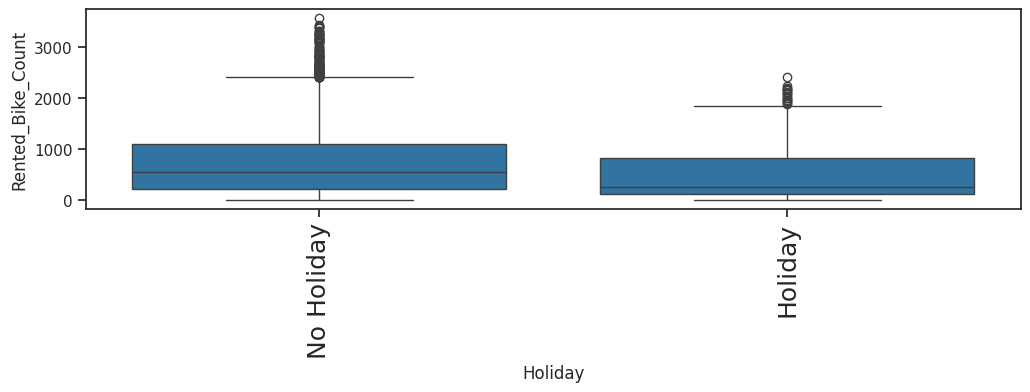

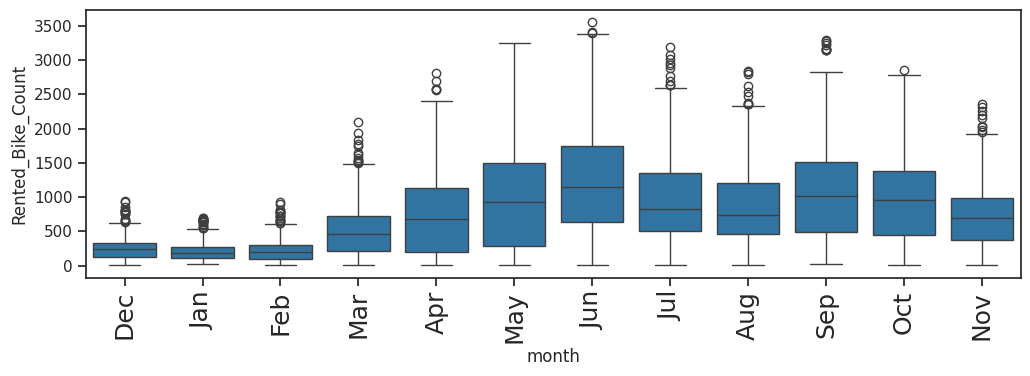

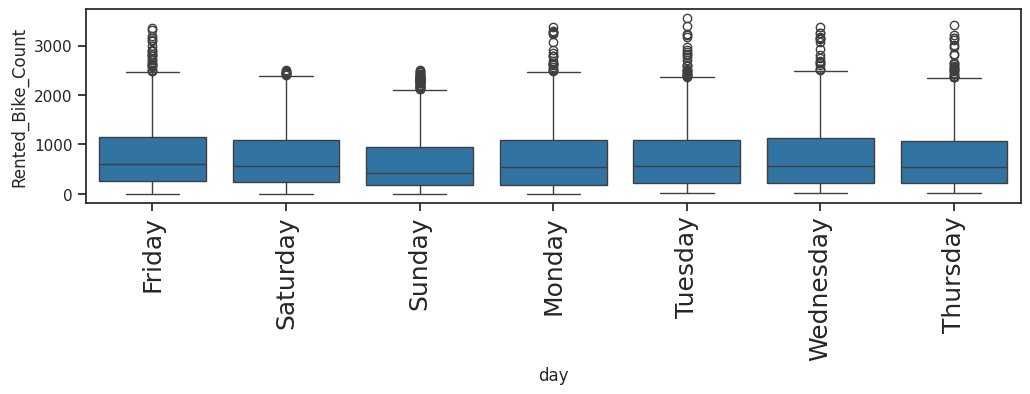

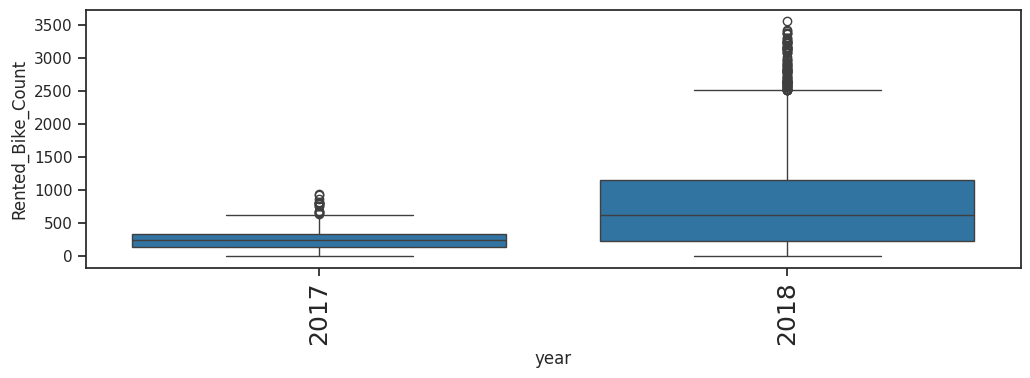

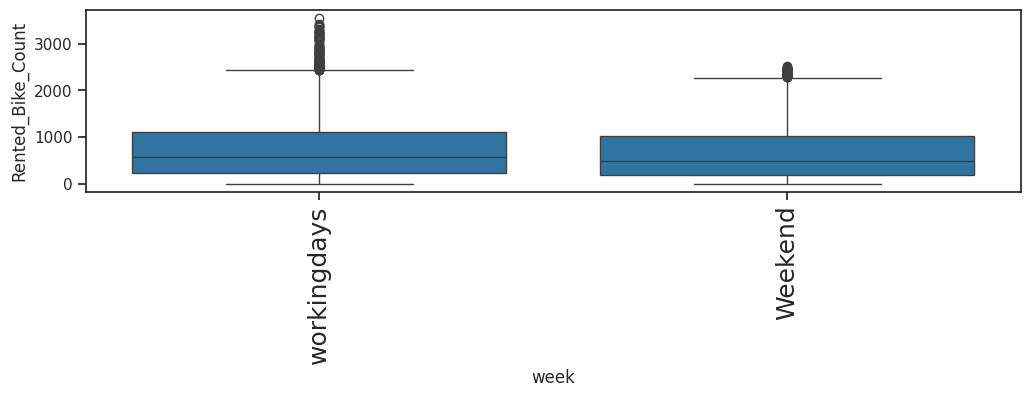

In [ ]:
box_plot(value,cat_feature)


In [ ]:
num_feature = value.select_dtypes(exclude = 'object')


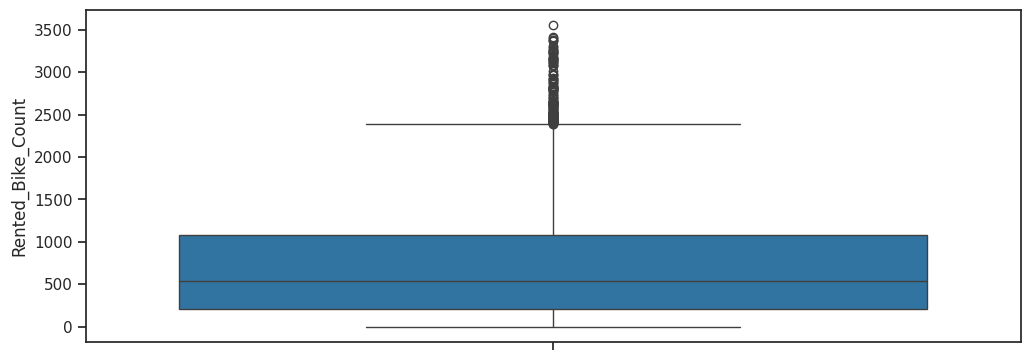

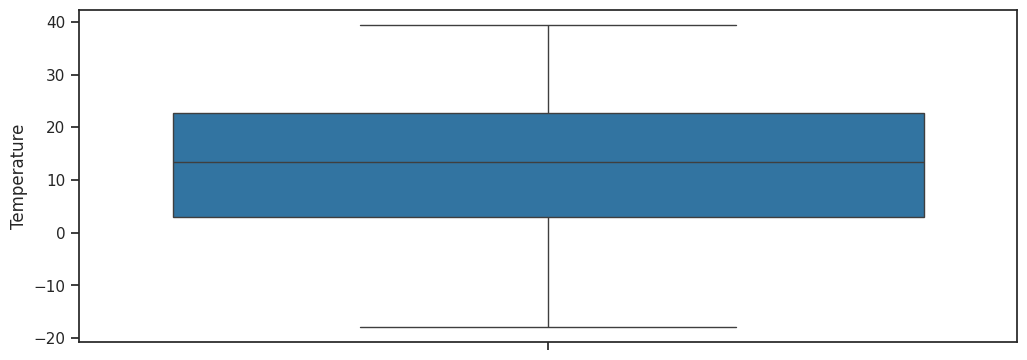

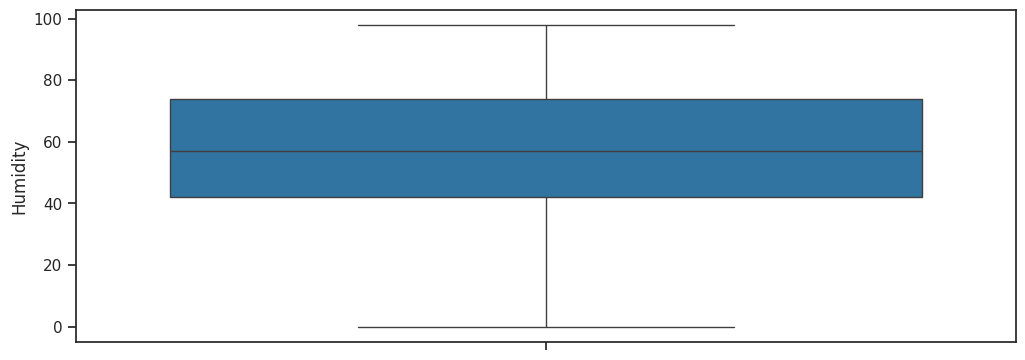

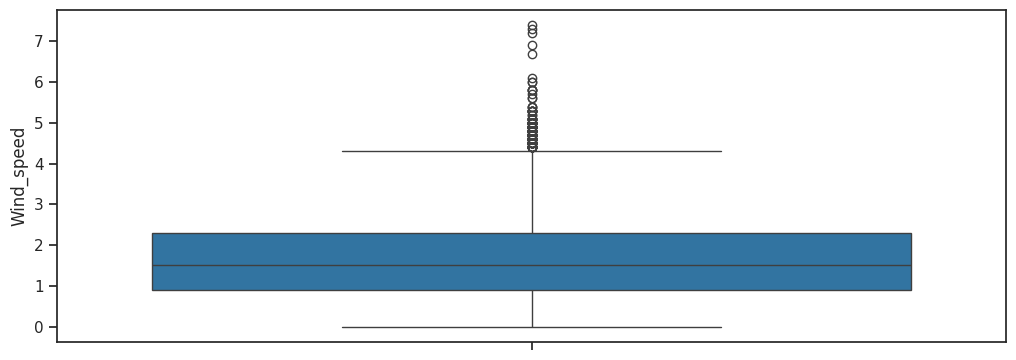

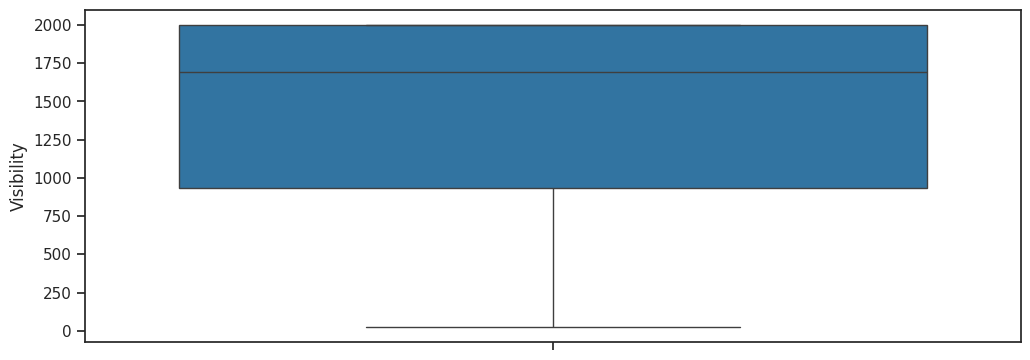

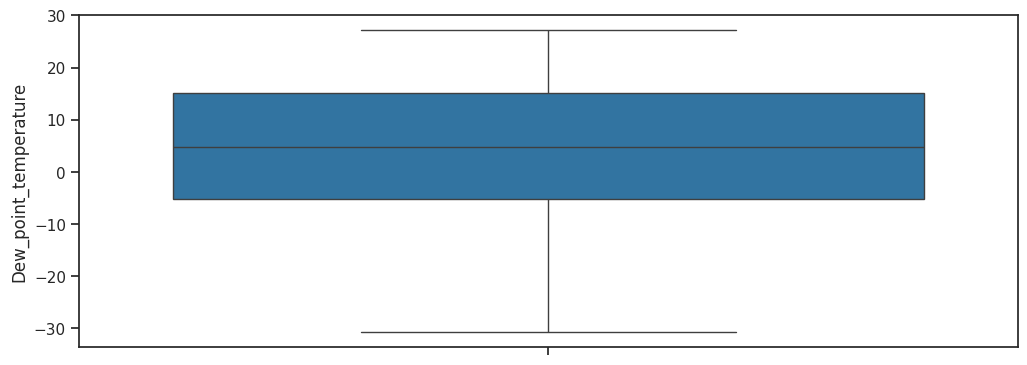

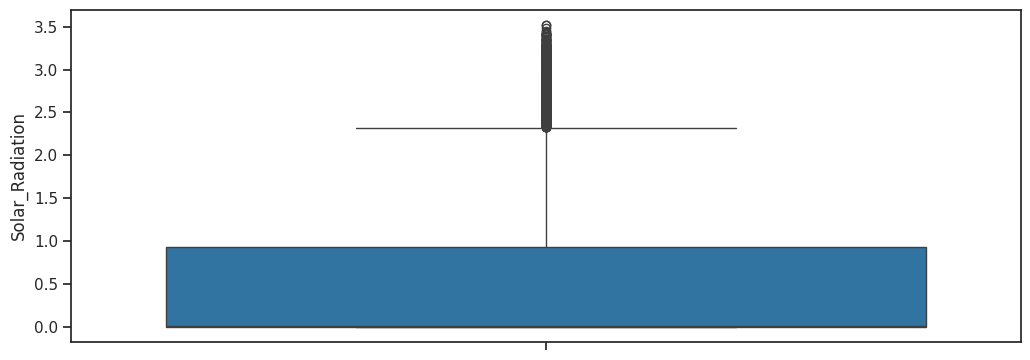

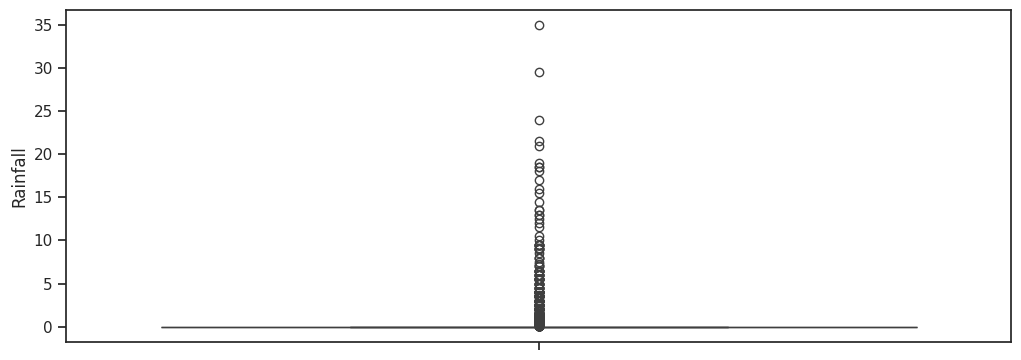

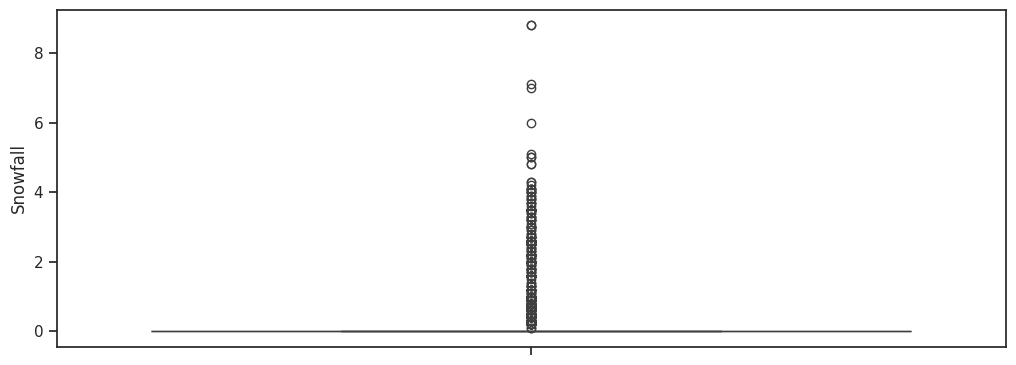

In [ ]:
box_plot(value,num_feature)


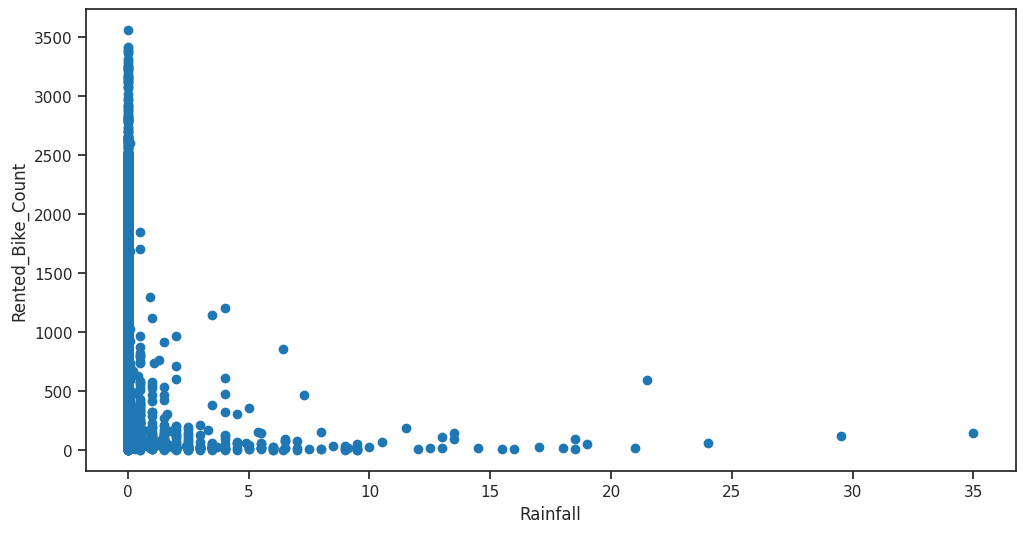

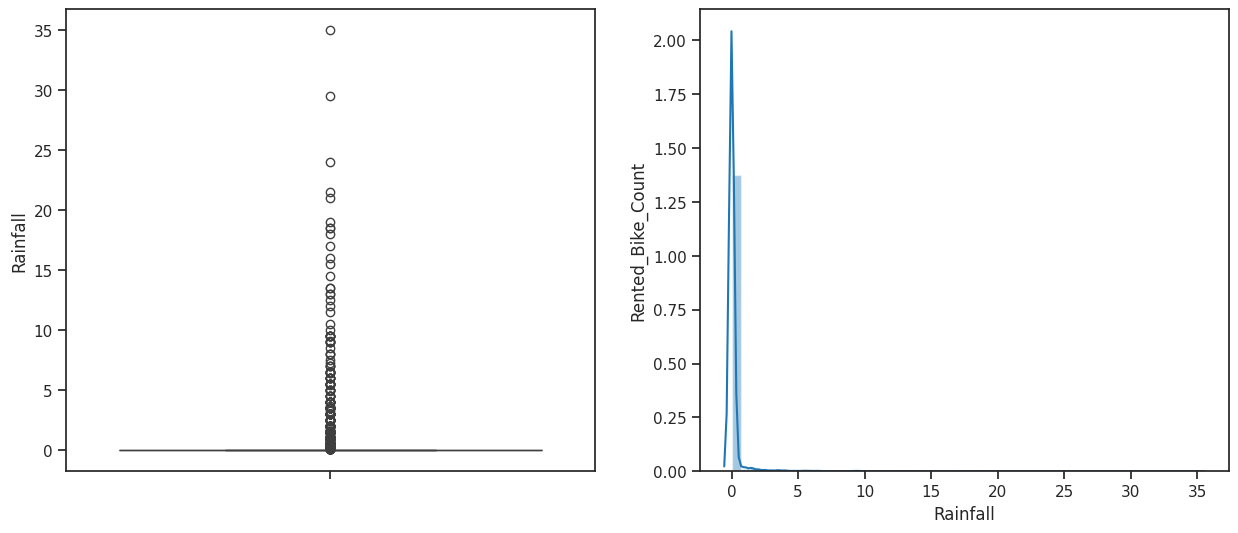

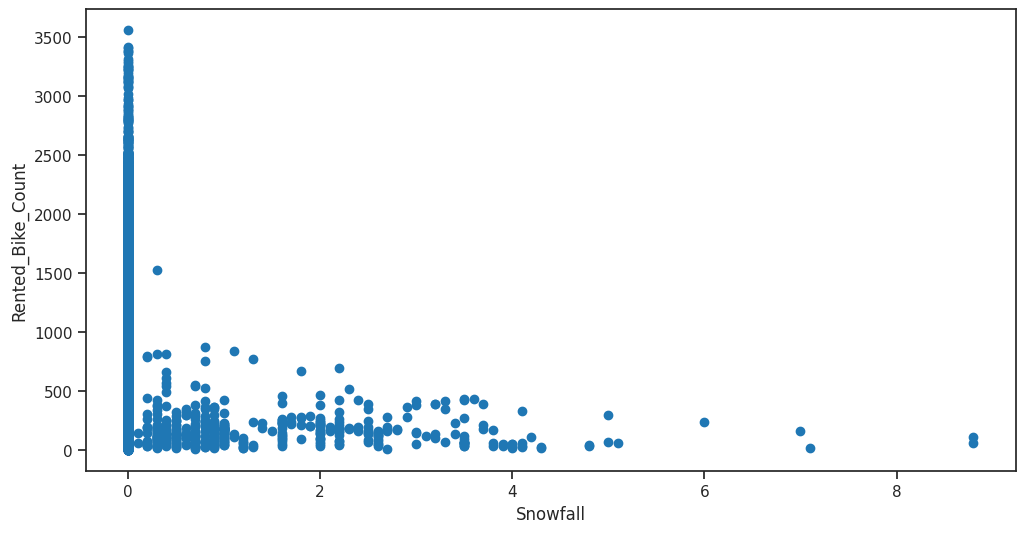

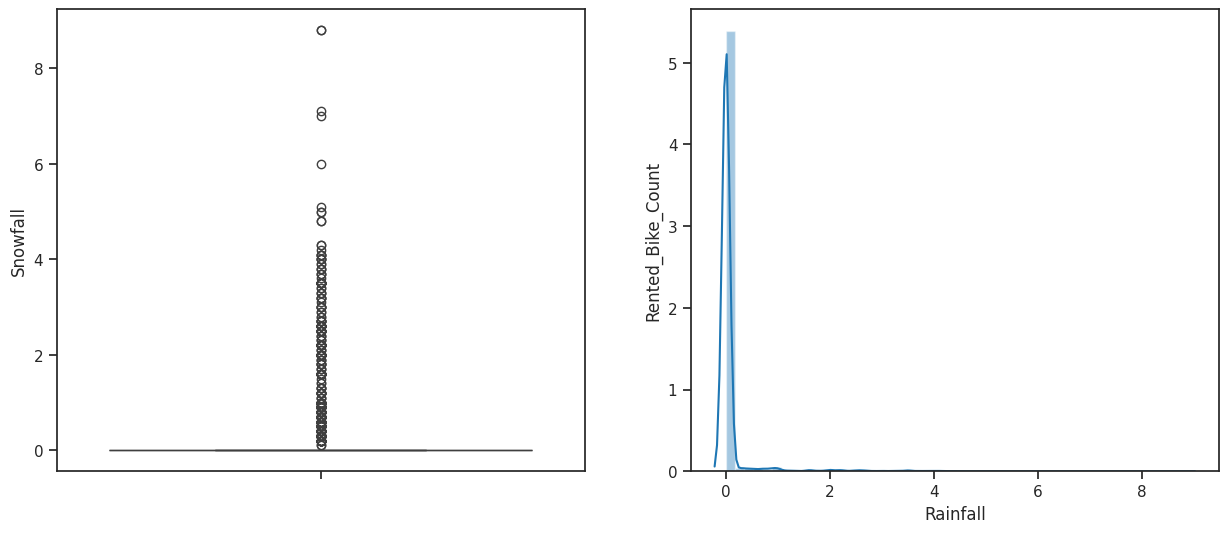

In [ ]:
#detecting outliers using scatter plot for snowfall and rainfall
# Scatter plot
for i in ['Rainfall','Snowfall']:
  fig, ax = plt.subplots(figsize = (12,6))
  ax.scatter(value[i], value['Rented_Bike_Count']);

  # x-axis label
  ax.set_xlabel(i);

  # y-axis label
  ax.set_ylabel('Rented_Bike_Count');

  #distribution and box plot
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=value[i])
  fig.set_title('')
  fig.set_ylabel(i)

  plt.subplot(1, 2, 2)
  fig = sns.distplot(value[i].dropna())
  fig.set_ylabel('Rented_Bike_Count')
  fig.set_xlabel("Rainfall")

  plt.show()

In [ ]:
#function to cap outliers
def remove_outlier(df,feature):
  upper_lim = df[feature].quantile(.95)
  lower_lim = df[feature].quantile(.05)
  df.loc[(df[feature] > upper_lim),feature] = upper_lim
  df.loc[(df[feature] < lower_lim),feature] = lower_lim
  return df[feature]

In [ ]:
#making copy for removing ouliers without affecting original
copy = value.copy()

In [ ]:
copy[copy['Rainfall'] > 0]['Rainfall'].value_counts()


Rainfall
0.500     114
1.000      64
1.500      55
0.100      44
2.000      30
         ... 
1.900       1
17.000      1
3.700       1
1.400       1
1.800       1
Name: count, Length: 60, dtype: int64

In [ ]:
copy['Rainfall']= remove_outlier(copy,'Rainfall')
copy['Snowfall']= remove_outlier(copy,'Snowfall')
copy['Rented_Bike_Count_new'] = remove_outlier(copy,'Rented_Bike_Count')

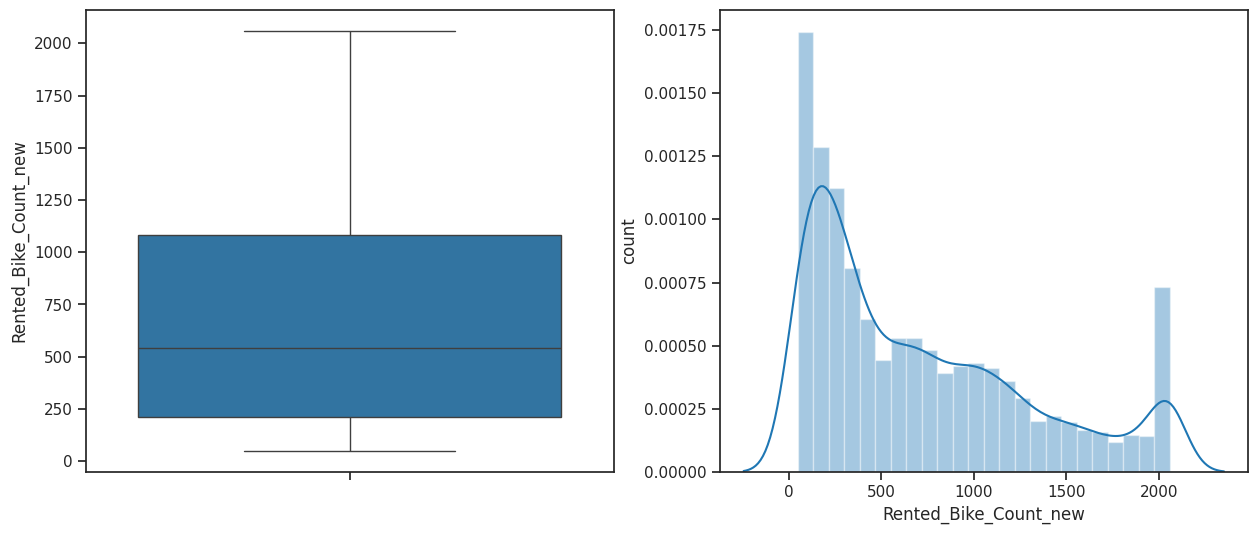

In [ ]:
#testing rented bike count after removal of outliers how it worked
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=copy['Rented_Bike_Count_new'])
fig.set_title('')
fig.set_ylabel("Rented_Bike_Count_new")

plt.subplot(1, 2, 2)
fig = sns.distplot(copy['Rented_Bike_Count_new'].dropna())
fig.set_ylabel('count')
fig.set_xlabel("Rented_Bike_Count_new")

plt.show()

In [ ]:
copy[copy['Rainfall'] > 0]['Rainfall'].value_counts()


Rainfall
0.500    427
0.100     44
0.200     20
0.400     16
0.300      9
Name: count, dtype: int64

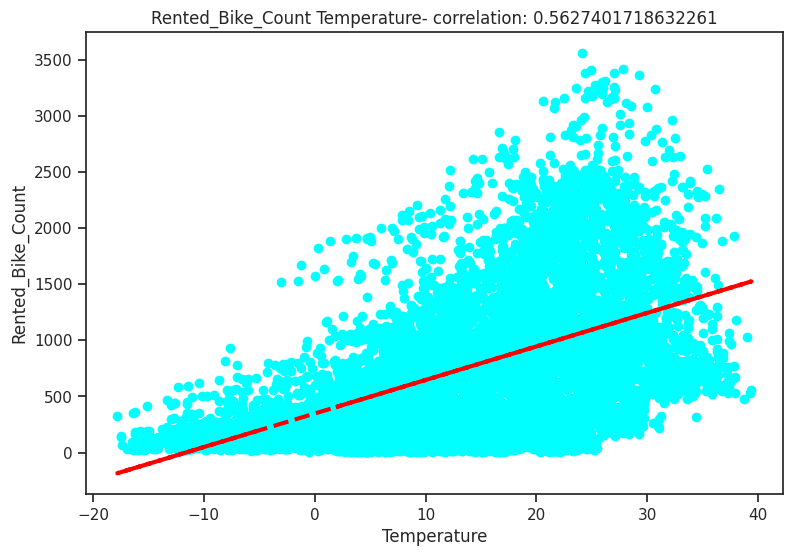

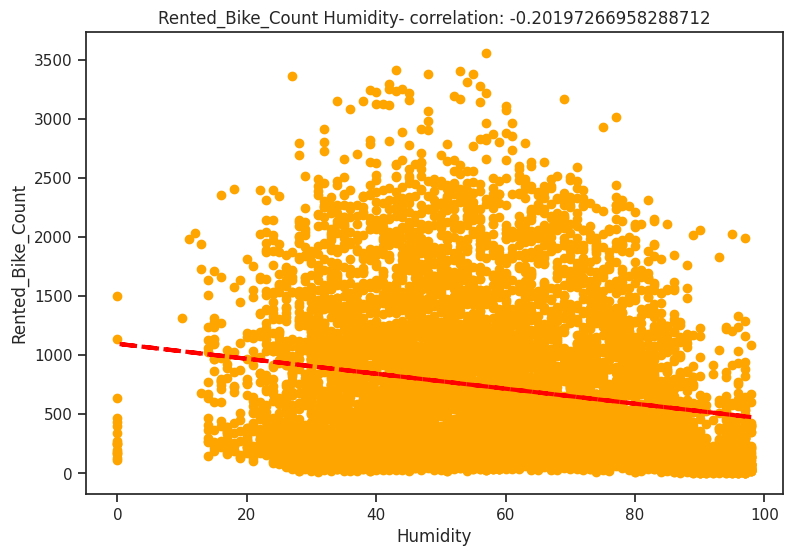

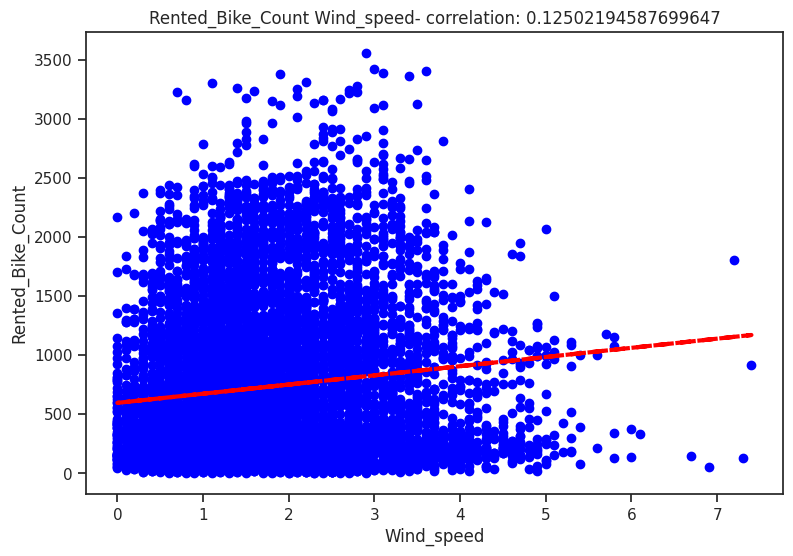

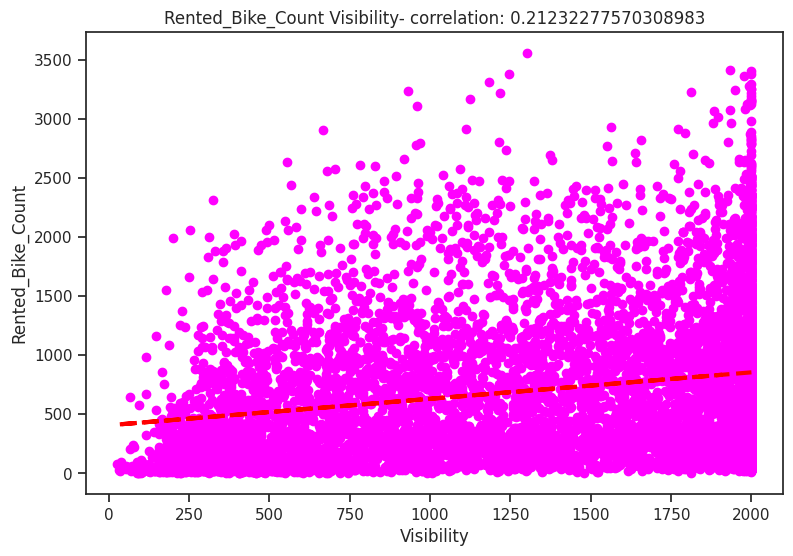

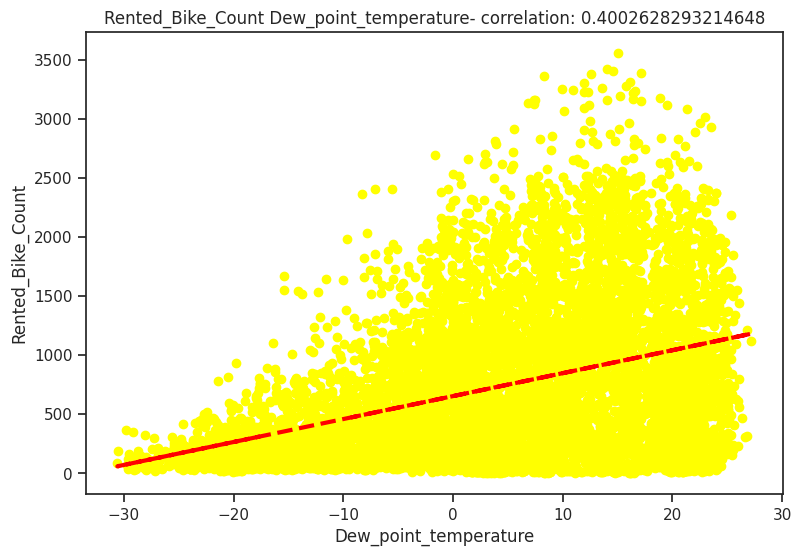

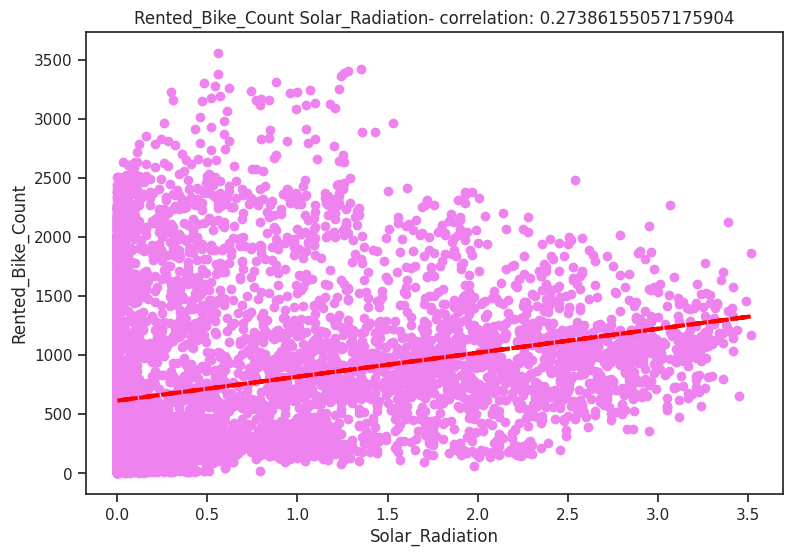

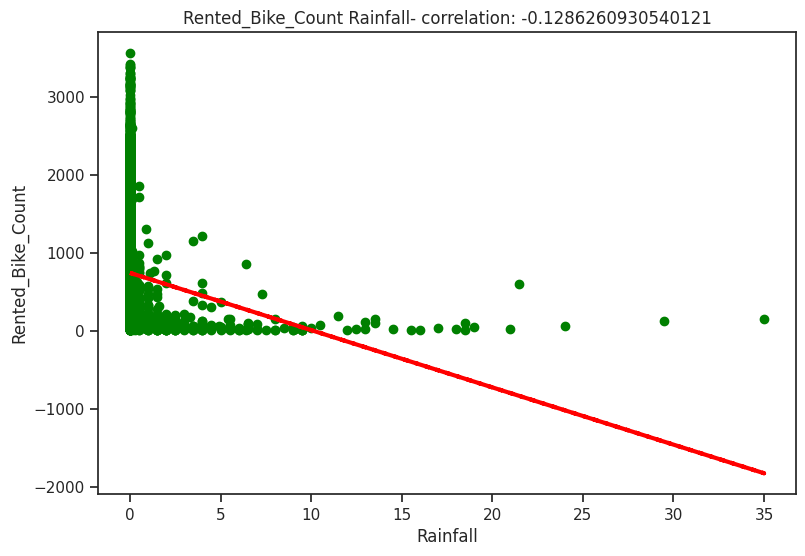

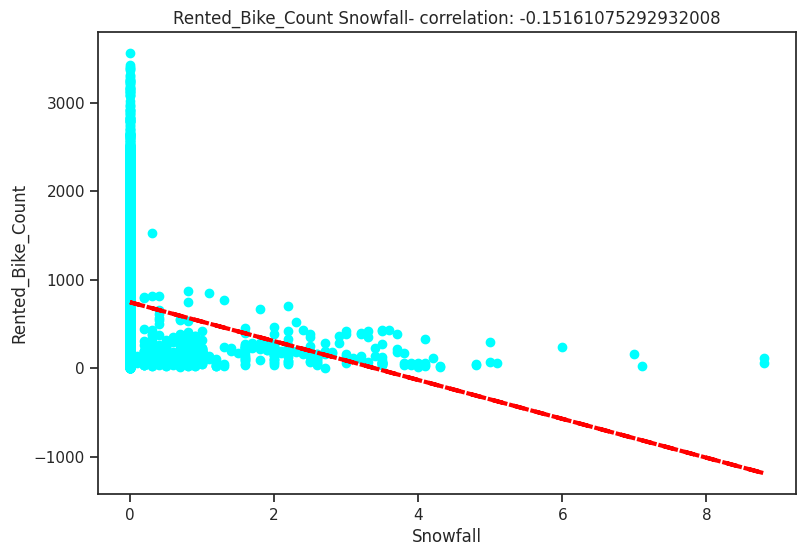

In [ ]:
#before removing multicollinearity, drwaing plot to see all other linear realtion
import itertools

colors = itertools.cycle(["cyan",'orange', "b", "magenta",  'yellow','violet', 'green' ]) #itertool helps in iterating over diff. values in list
for col in num_feature[0:-1]:
    if col == 'Rented_Bike_Count':
      pass
    else:
      fig = plt.figure(figsize=(9, 6))
      sns.set_context('notebook')
      ax = fig.gca()
      feature = value[col]
      label = value['Rented_Bike_Count']
      correlation = feature.corr(label)
      plt.scatter(x=feature, y=label,color=next(colors))
      plt.xlabel(col)
      plt.ylabel('Rented_Bike_Count')
      ax.set_title('Rented_Bike_Count ' + col + '- correlation: ' + str(correlation))
      z = np.polyfit(value[col], value['Rented_Bike_Count'], 1)
      y_hat = np.poly1d(z)(value[col])

      plt.plot(value[col], y_hat, "r--", lw=3)

plt.show()

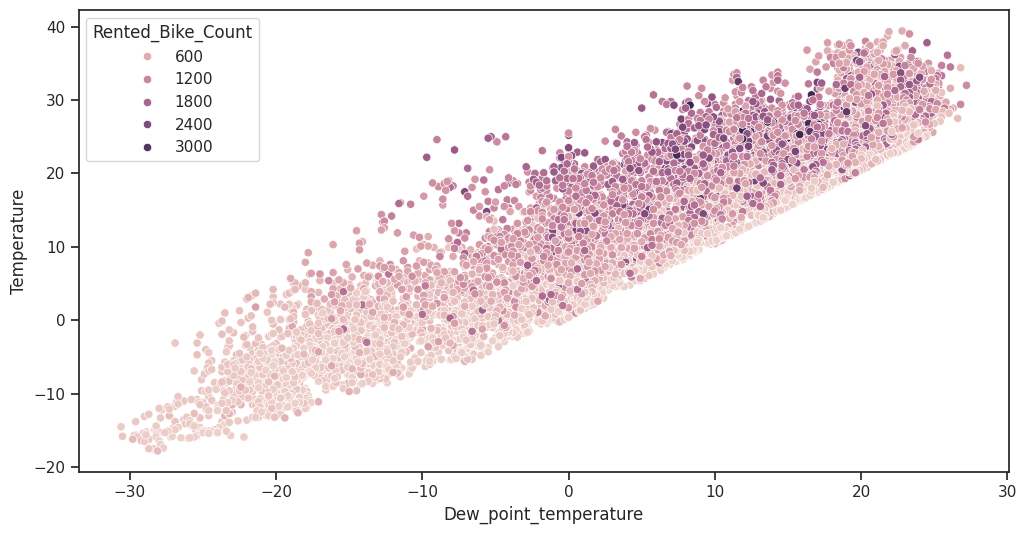

In [ ]:
#scatter plot between Dew point temperature and temperature
plt.figure(figsize = (12,6))
sns.scatterplot(x=value["Dew_point_temperature"],y= value["Temperature"],hue=value['Rented_Bike_Count']); # both are correlated

In [ ]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#calculating vif
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count']]])

variables    VIF
0            Temperature 28.965
1               Humidity  5.018
2             Wind_speed  4.521
3             Visibility  9.043
4  Dew_point_temperature 15.390
5        Solar_Radiation  2.808
6               Rainfall  1.080
7               Snowfall  1.121

In [ ]:
#calculating vif by ignoring dew point temperature
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature']]])

variables   VIF
0      Temperature 3.103
1         Humidity 4.712
2       Wind_speed 4.089
3       Visibility 4.403
4  Solar_Radiation 2.233
5         Rainfall 1.079
6         Snowfall 1.121

In [ ]:
#calculating vif by ignoring temperature
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count','Temperature']]])

variables   VIF
0               Humidity 4.997
1             Wind_speed 4.271
2             Visibility 4.639
3  Dew_point_temperature 1.649
4        Solar_Radiation 1.891
5               Rainfall 1.080
6               Snowfall 1.113

In [ ]:
# finding correlation between functioning day and rented bike count
corr = trial[['Rented_Bike_Count','Hour','Temperature','Dew_point_temperature']].corr()
corr

Rented_Bike_Count  Hour  Temperature  \
Rented_Bike_Count                  1.000 0.410        0.539   
Hour                               0.410 1.000        0.124   
Temperature                        0.539 0.124        1.000   
Dew_point_temperature              0.380 0.003        0.913   

                       Dew_point_temperature  
Rented_Bike_Count                      0.380  
Hour                                   0.003  
Temperature                            0.913  
Dew_point_temperature                  1.000

In [ ]:
#since day is categorised as working day and weekend, dropping day column along with dew point
values = value.drop(columns=['day'], axis = 1)

In [ ]:
values = values.drop(columns =['year'], axis = 1)

In [ ]:
values = values.drop(columns=['Dew_point_temperature'], axis = 1)

In [ ]:
num = values.select_dtypes(exclude ='object')
cat = values.select_dtypes(include ='object')
print(f' numeric: {num.columns.to_list()}\n categorial : {cat.columns.to_list()}')

 numeric: ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']
 categorial : ['Hour', 'Seasons', 'Holiday', 'month', 'week']


In [ ]:
#applying label encoder
encoded = values.apply(LabelEncoder().fit_transform)
encoded.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                252     0          111        28          22        1779   

   Solar_Radiation  Rainfall  Snowfall  Seasons  Holiday  month  week  
0                0         0         0        3        1      2     1

In [ ]:
#encoding using dummies
dumcoded = pd.get_dummies(values,drop_first=True,sparse=True)
dumcoded.head(1)

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254       -5.200        37       2.200        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_Feb  \
0            0.000     0.000     0.000   False   False  ...      False   

   month_Jan  month_Jul  month_Jun  month_Mar  month_May  month_Nov  \
0      False      False      False      False      False      False   

   month_Oct  month_Sep  week_workingdays  
0      False      False              True  

[1 rows x 47 columns]

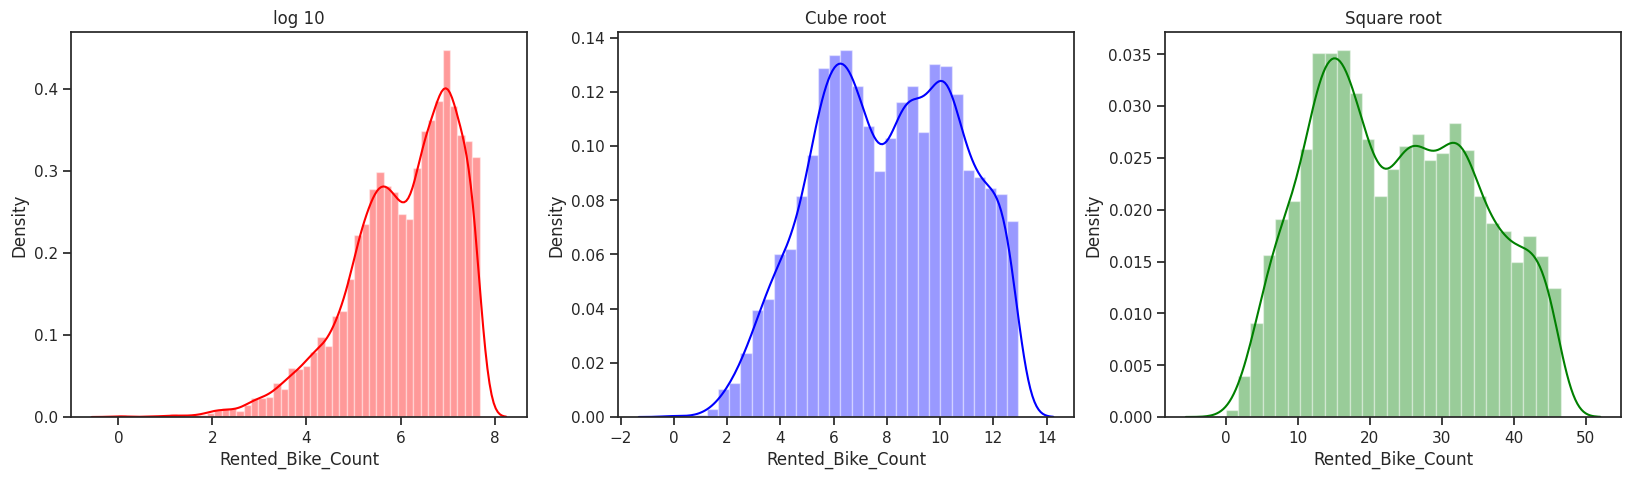

In [ ]:
# Dependent variable 'Rented_Bike_Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10
sns.distplot(np.log1p(encoded['Rented_Bike_Count']),ax=axes[0],color='red').set_title("log 10"); #np.log1p : Return the natural logarithm of one plus the input array, element-wise
# here we use cube root
sns.distplot(np.cbrt(encoded['Rented_Bike_Count']),ax=axes[1],color='blue').set_title("Cube root");
# here we use square root
sns.distplot(np.sqrt(encoded['Rented_Bike_Count']),ax=axes[2], color='green').set_title("Square root");

In [ ]:
# applying square root on Rented_Bike_Count
encoded['Rented_Bike_Count']=np.sqrt(encoded['Rented_Bike_Count'])

In [ ]:
#X = independent variable and y = target variable
X=encoded.drop('Rented_Bike_Count',axis=1)
y=encoded['Rented_Bike_Count']

In [ ]:
X.head(1)


Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0     0          111        28          22        1779                0   

   Rainfall  Snowfall  Seasons  Holiday  month  week  
0         0         0        3        1      2     1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)


In [ ]:
print(f'Shape of X_train => {X_train.shape}, Shape of X_test => {X_test.shape}' )
print(f'Shape of y_train => {y_train.shape}, Shape of y_test => {y_test.shape}' )

Shape of X_train => (6348, 12), Shape of X_test => (2117, 12)
Shape of y_train => (6348,), Shape of y_test => (2117,)


In [ ]:
#scaling feature
scaler = StandardScaler()
# standardization
X_train = scaler.fit_transform(X_train)           #fit_transform = performs fit and transform on the input data at a single time
X_test = scaler.transform(X_test)

In [ ]:
model1 = [
          ['Linear Regression ', LinearRegression()],
           ['Lasso ', Lasso(alpha =0.1 , max_iter= 2000)],
           ['Ridge ', Ridge(alpha =0.1 , max_iter= 2000)],
           ['KNeighborsRegressor ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='absolute_error',random_state=42)]
        ]

    ====================  Linear Regression  ====================


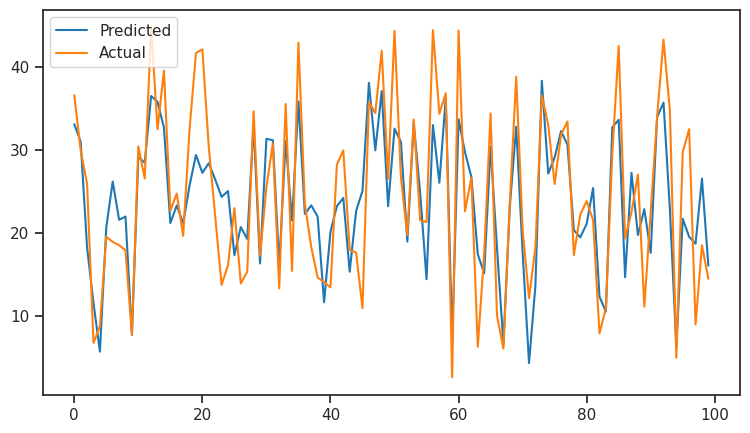

    ====================  Lasso  ====================


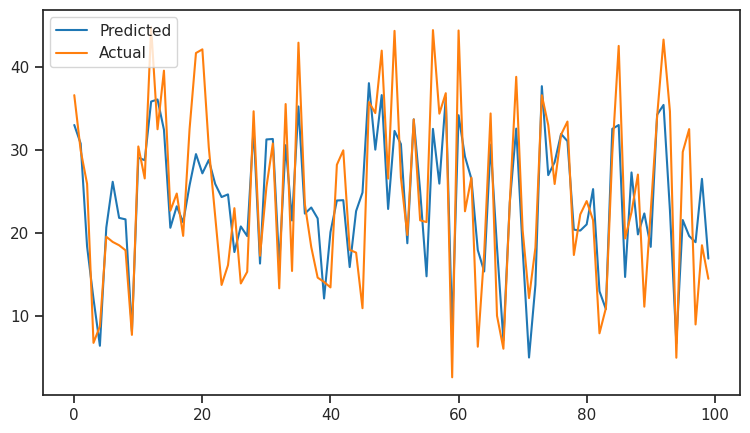

    ====================  Ridge  ====================


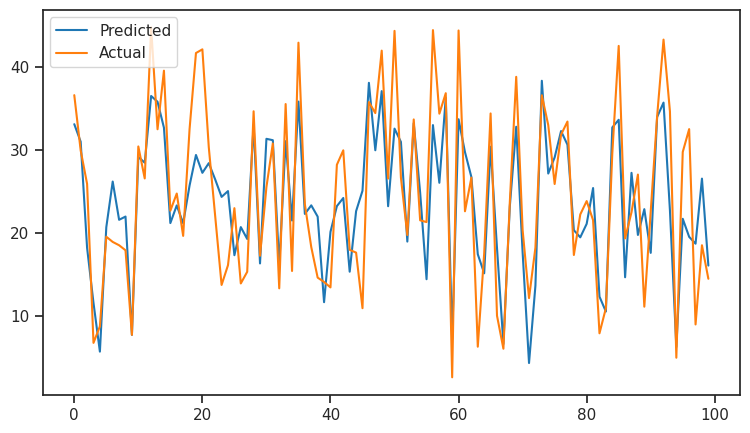

    ====================  KNeighborsRegressor  ====================


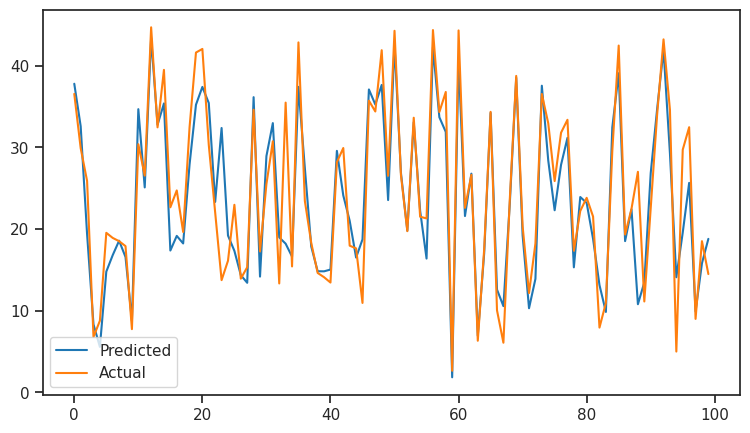

    ====================  RandomForest  ====================


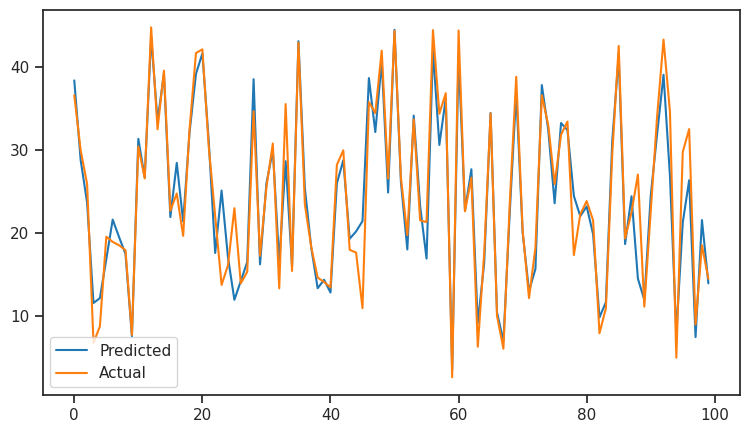

In [ ]:
#running the models and getting the scores
model_score = []
for name,model in model1 :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1-(1-r2(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print(f'    {20* "="}  {name} {20* "="}')  # plot actual vs predicted graph
    plt.figure(figsize=(9,5))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()
    model_score.append(model_data)

In [ ]:
#result for model
model1_df = pd.DataFrame(model_score)
model1_df

Name    MSE  RMSE  R2_Score  ADJ_R2
0    Linear Regression  41.671 6.455     0.660   0.658
1                Lasso  41.713 6.459     0.659   0.657
2                Ridge  41.671 6.455     0.660   0.658
3  KNeighborsRegressor  21.818 4.671     0.822   0.821
4         RandomForest   8.859 2.976     0.928   0.927

In [ ]:
model1_df.sort_values(by=['R2_Score'], ascending = False)

Name    MSE  RMSE  R2_Score  ADJ_R2
4         RandomForest   8.859 2.976     0.928   0.927
3  KNeighborsRegressor  21.818 4.671     0.822   0.821
0    Linear Regression  41.671 6.455     0.660   0.658
2                Ridge  41.671 6.455     0.660   0.658
1                Lasso  41.713 6.459     0.659   0.657

In [ ]:
#boosting algorithm
model2 = [
           ['GradientBoostingRegressor ', GradientBoostingRegressor(n_estimators=400, max_depth=4)] ,
           ['Light-GBM ', lightgbm.LGBMRegressor(num_leaves=41, n_estimators=400,random_state=42)],
           ['XGBRegressor ', XGBRegressor(objective= 'reg:squarederror')]
]

    ====================  GradientBoostingRegressor  ====================


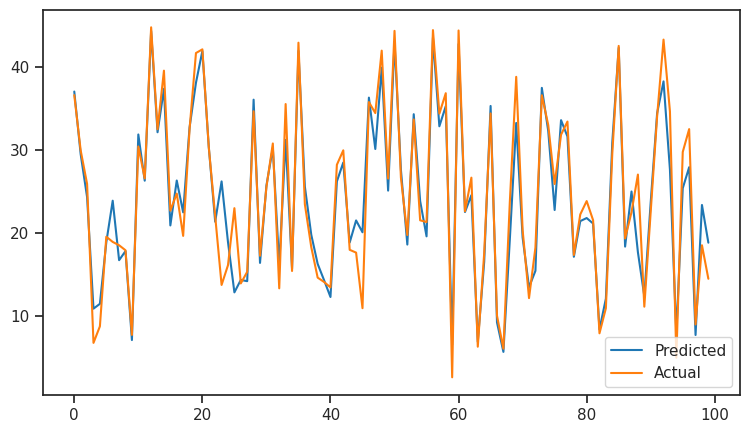

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 6348, number of used features: 12
[LightGBM] [Info] Start training from score 23.752765
    ====================  Light-GBM  ====================


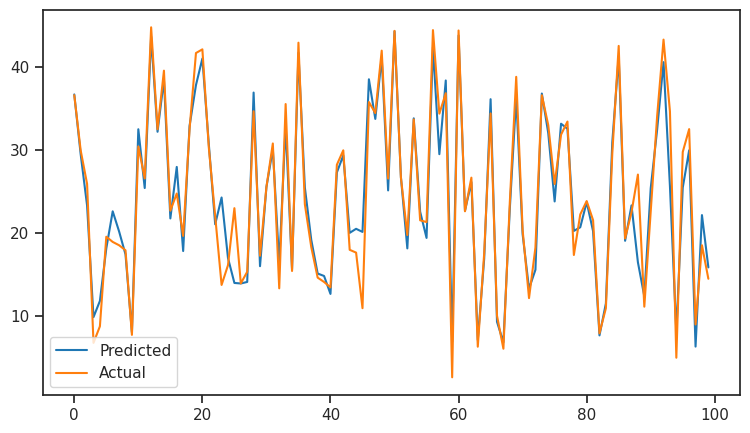

    ====================  XGBRegressor  ====================


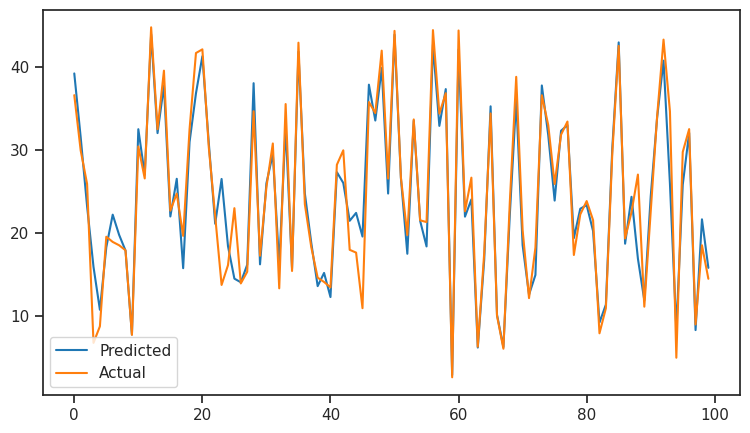

In [ ]:
#running the models and getting the scores
model_score2 = []
for name,model in model2 :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1-(1-r2(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print(f'    {20* "="}  {name} {20* "="}')  # plot actual vs predicted graph
    plt.figure(figsize=(9,5))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()
    model_score2.append(model_data)

In [ ]:
model2_df = pd.DataFrame(model_score2)
model2_df

Name   MSE  RMSE  R2_Score  ADJ_R2
0  GradientBoostingRegressor  7.335 2.708     0.940   0.940
1                  Light-GBM  6.452 2.540     0.947   0.947
2               XGBRegressor  7.150 2.674     0.942   0.941

In [ ]:
#merging final result
a= [model1_df,model2_df]
final = pd.concat(a,ignore_index=True)
final.sort_values('R2_Score', ascending =False)

Name    MSE  RMSE  R2_Score  ADJ_R2
6                  Light-GBM   6.452 2.540     0.947   0.947
7               XGBRegressor   7.150 2.674     0.942   0.941
5  GradientBoostingRegressor   7.335 2.708     0.940   0.940
4               RandomForest   8.859 2.976     0.928   0.927
3        KNeighborsRegressor  21.818 4.671     0.822   0.821
0          Linear Regression  41.671 6.455     0.660   0.658
2                      Ridge  41.671 6.455     0.660   0.658
1                      Lasso  41.713 6.459     0.659   0.657

In [ ]:
model = XGBRegressor(objective= 'reg:squarederror',subsample=0.7)


In [ ]:
params = {
     'gamma' : [ -0.5, 0, 0.5, 1],
    'learning_rate' :[0.001, 0.01, 0.1, 5,10 ],
    'n_estimators' : [25,50,75,100,500] ,
    'max_depth' : [3, 5, 7,10]
        }

In [ ]:
gridsearch = GridSearchCV(model , params , cv=2 , return_train_score=True)


In [ ]:
gridsearch.fit(X_train , y_train )

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [-0.5, 0, 0.5, 1],
                         'learning_rate': [0.001, 0.01, 0.1, 5, 10],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [25, 50, 75, 100, 500]},
             return_train_score=True)

In [ ]:
#print best parameters
print(gridsearch.best_params_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}


In [ ]:
#making prediciton
gridsearch_predictions = gridsearch.predict( X_test )

In [ ]:
XGBRegressor_with_hyper = {
'Name': "XGBRegressor_with_hyper",
'MSE': [mse(y_test,gridsearch.predict(X_test))],
'RMSE': [np.sqrt(mse(y_test,gridsearch.predict(X_test)))],
'R2_Score': [r2(y_test,gridsearch_predictions)],
'ADJ_R2': [1-(1-r2(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))],
}

In [ ]:
#concating hyperparameter tuned value with ealier result
Result = pd.DataFrame.from_dict(XGBRegressor_with_hyper)
#merging final result
b = [final,Result]
final_df = pd.concat(b,ignore_index=True)
final_df.sort_values('R2_Score', ascending =False)

Name    MSE  RMSE  R2_Score  ADJ_R2
6                  Light-GBM   6.452 2.540     0.947   0.947
8     XGBRegressor_with_hyper  6.466 2.543     0.947   0.941
7               XGBRegressor   7.150 2.674     0.942   0.941
5  GradientBoostingRegressor   7.335 2.708     0.940   0.940
4               RandomForest   8.859 2.976     0.928   0.927
3        KNeighborsRegressor  21.818 4.671     0.822   0.821
0          Linear Regression  41.671 6.455     0.660   0.658
2                      Ridge  41.671 6.455     0.660   0.658
1                      Lasso  41.713 6.459     0.659   0.657

In [ ]:
y_pred_XGB = gridsearch.predict( X_test )

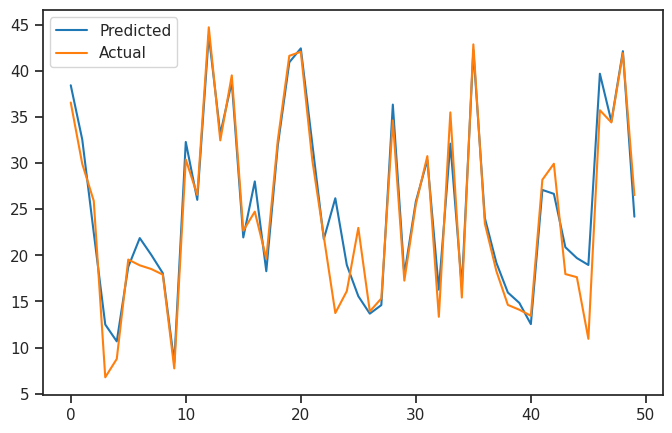

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_XGB)[:50])
plt.plot((np.array(y_test))[:50])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
pd.DataFrame(zip(y_test, y_pred_XGB, (y_test - y_pred_XGB)), columns = ['actual', 'predicted', 'Difference(act-pre)'])[:10]


actual  predicted  Difference(act-pre)
0  36.565     38.439               -1.874
1  29.917     32.554               -2.637
2  25.904     22.454                3.449
3   6.782     12.503               -5.721
4   8.775     10.679               -1.904
5  19.545     18.757                0.788
6  18.921     21.874               -2.953
7  18.520     20.056               -1.536
8  17.916     18.077               -0.160
9   7.746      8.382               -0.636

In [ ]:
# assigning best estimator
rf_optimal_model = gridsearch.best_estimator_

In [ ]:
#displaying feature importance
rf_optimal_model.feature_importances_

array([0.16509227, 0.147083  , 0.09520619, 0.00829535, 0.00830744,
       0.02334405, 0.1874066 , 0.02281013, 0.13465966, 0.06515049,
       0.05730166, 0.08534311], dtype=float32)

In [ ]:
#getting columns name as X_train is array and column name 0,1,2, etc
t = pd.DataFrame(X_train, columns = X.columns)

In [ ]:
#creating new dataframe for feature and its importance value
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(t.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
#sorting feature imortance from highest to lowest
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
#plotting pie plot for feature importance using plotly
fig = px.pie(importance_df, values='Feature Importance', names='Feature', title='Feature Importance');
#
fig.update_traces(textposition='inside', textinfo='percent+label');
fig.show();